In [1]:
import pandas as pd
import numpy as np
from skimpy import clean_columns
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import datetime
import scipy.stats as stats
from datetime import timedelta

/Users/chloecho/anaconda3/envs/cornell_dev/lib/python3.11/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


- No sig differences in biomass in field corn or soy
- No sig differences in stand loss in soy
- Sig higher stand count in fung-only field corn

In [148]:
stand = pd.read_csv('Data/stand_loss.csv')
stand

,Data Collector,Field ID,Date,Sampling period,Crop,Treatment,Section number,Plant growth stage,Stand count,Notes
0,Chloe Yi-Luo Cho,CHO_GEN,6/9/2025,VE/V1,Soybean,Neonic,1,V1,88.0,NaN
1,Chloe Yi-Luo Cho,CHO_GEN,6/9/2025,VE/V1,Soybean,Neonic,2,V1,89.0,NaN
2,Chloe Yi-Luo Cho,CHO_GEN,6/9/2025,VE/V1,Soybean,Neonic,3,V1,85.0,NaN
3,Chloe Yi-Luo Cho,CHO_GEN,6/9/2025,VE/V1,Soybean,Neonic,4,V1,90.0,NaN
4,Chloe Yi-Luo Cho,CHO_GEN,6/9/2025,VE/V1,Soybean,Neonic,5,V1,94.0,NaN
...,...,...,...,...,...,...,...,...,...,...
1111,Marion Zuefle,ZUE_MYT,7/15/2025,V3/V4,Snap bean,Fung,5,V2/V3,65.0,NaN
1112,Marion Zuefle,ZUE_MYT,7/15/2025,V3/V4,Snap bean,Fung,6,V2/V3,75.0,NaN
1113,Marion Zuefle,ZUE_MYT,7/15/2025,V3/V4,Snap bean,Fung,7,V2/V3,80.0,NaN
1114,Marion Zuefle,ZUE_MYT,7/15/2025,V3/V4,Snap bean,Fung,8,V2/V3,85.0,NaN


In [149]:
biomass = pd.read_csv('Data/fresh_biomass.csv')
biomass

,Data Collector,Field ID,Date,Sampling period,Crop,Treatment,Section number,Plant growth stage,Number of plants,Total weight (g),Notes,Untared weight (g)
0,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,1,V3,15,79.70,NaN,NaN
1,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,2,V3,15,73.80,NaN,NaN
2,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,3,V3,15,73.40,NaN,NaN
3,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,4,V3,15,78.60,NaN,NaN
4,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,5,V3,15,97.70,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
625,Marion Zuefle,ZUE_MYT,7/15/2025,V3/V4,Snap bean,Fung,5,V2/V3,15,92.24,Corrected for 7.59 g bag,99.83
626,Marion Zuefle,ZUE_MYT,7/15/2025,V3/V4,Snap bean,Fung,6,V2/V3,15,131.41,Corrected for 7.59 g bag,139.00
627,Marion Zuefle,ZUE_MYT,7/15/2025,V3/V4,Snap bean,Fung,7,V2/V3,15,116.41,Corrected for 7.59 g bag,124.00
628,Marion Zuefle,ZUE_MYT,7/15/2025,V3/V4,Snap bean,Fung,8,V2/V3,15,125.60,Corrected for 7.59 g bag,133.19


In [143]:
deli_cup = pd.read_csv('Data/deli_cup.csv')
deli_cup

,Container Number,Container Type,Project,Field ID,Treatment,Collection Date,Seed Type,Number Seeds,SCM Larvae Sum,SCM Pupae Sum,SCM Seed,Phorid Seed,Other Damage,Wireworms,Other Seeds,Wireworm Presence/absence,Grub presence/absence,Checked?,Ordered Entered,Notes
0,25_D_1181,DELI,R,CER_DEL_1,NEONIC,5/28/25,FIELD CORN,14.0,1,0,0,0,1,3,0,YES,YES,Y,294,NaN
1,25_D_1182,DELI,R,CER_DEL_1,FUNG,5/28/25,FIELD CORN,14.0,0,0,0,0,0,0,0,NO,NO,Y,293,NaN
2,25_D_1183,DELI,R,CER_DEL_1,NEONIC,5/28/25,FIELD CORN,17.0,2,0,0,0,0,0,0,NO,NO,Y,380,NaN
3,25_D_1184,DELI,R,CER_DEL_1,NEONIC,5/28/25,FIELD CORN,15.0,0,0,0,0,0,0,0,NO,NO,Y,308,NaN
4,25_D_1185,DELI,R,CER_DEL_1,FUNG,5/28/25,FIELD CORN,15.0,2,0,0,0,0,0,0,NO,NO,Y,51,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,25_D_2513,DELI,R,ZUE_VOT,FUNG,7/4/25,SNAP,15.0,0,0,0,0,0,0,0,NO,NO,Y,712,NaN
982,25_D_2514,DELI,R,ZUE_VOT,FUNG,7/3/25,SNAP,15.0,0,0,0,0,0,0,0,NO,NO,Y,710,NaN
983,25_D_2515,DELI,R,ZUE_VOT,FUNG,7/8/25,SNAP,15.0,0,0,0,0,0,0,0,NO,NO,Y,716,NaN
984,25_D_2516,DELI,R,ZUE_VOT,FUNG,7/6/25,SNAP,15.0,0,0,0,0,0,0,0,NO,NO,Y,714,NaN


In [76]:
snap_yield = pd.read_csv('Data/snap_bean_yield.csv')
snap_yield

,Data Collector,Field ID,Date,Sampling period,Treatment,Section,Number of Pods,Total weight (kg),Number of Plants,Notes
0,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Neonic,1,856,1.40,110,NaN
1,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Neonic,2,783,1.50,115,NaN
2,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Neonic,3,896,1.76,114,NaN
3,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Neonic,4,907,1.86,96,NaN
4,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Neonic,5,644,0.94,106,NaN
5,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Neonic,6,483,0.94,104,NaN
6,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Fung,1,416,1.04,43,NaN
7,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Fung,2,661,1.42,69,NaN
8,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Fung,3,441,0.64,59,NaN
9,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Fung,4,370,0.75,61,NaN


In [77]:
sweet_corn_yield = pd.read_csv('Data/sweet_corn_yield.csv')
sweet_corn_yield

,Data Collector,Field ID,Date,Sampling period,Treatment,Section,Ears,Total weight (kg),Number of Plants,Notes
0,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Neonic,1,19,9.98,27,NaN
1,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Neonic,2,16,6.18,18,NaN
2,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Neonic,3,16,7.32,15,NaN
3,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Neonic,4,21,9.64,19,NaN
4,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Neonic,5,18,8.10,20,NaN
5,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Neonic,6,19,8.34,18,NaN
6,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Fung,1,22,7.28,22,NaN
7,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Fung,2,21,7.56,24,NaN
8,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Fung,3,18,5.72,21,NaN
9,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Fung,4,18,5.46,21,NaN


In [144]:
deli_cup['Total SCM'] = deli_cup['SCM Larvae Sum'] + deli_cup['SCM Pupae Sum']
field_deli_cup = deli_cup[(deli_cup['Seed Type'] != 'SWEET CORN') & (deli_cup['Seed Type'] != 'SNAP')]

field_deli_cup['Treatment'] = field_deli_cup['Treatment'].replace({'NEONIC': 'Treated', 'FUNG': 'Untreated'})
field_deli_cup['Seed Type'] = field_deli_cup['Seed Type'].replace({'FIELD CORN': 'Field corn', 'SOY': 'Soybean'})
field_deli_cup = field_deli_cup.rename(columns={'Seed Type': 'Crop'})

field_deli_cup['Avg SCM'] = field_deli_cup['Total SCM'] / field_deli_cup['Number Seeds']


field_deli_cup

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_51884/3951772869.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_deli_cup['Treatment'] = field_deli_cup['Treatment'].replace({'NEONIC': 'Treated', 'FUNG': 'Untreated'})
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_51884/3951772869.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_deli_cup['Seed Type'] = field_deli_cup['Seed Type'].replace({'FIELD CORN': 'Field corn', 'SOY': 'Soybean'})


,Container Number,Container Type,Project,Field ID,Treatment,Collection Date,Crop,Number Seeds,SCM Larvae Sum,SCM Pupae Sum,...,Other Damage,Wireworms,Other Seeds,Wireworm Presence/absence,Grub presence/absence,Checked?,Ordered Entered,Notes,Total SCM,Avg SCM
0,25_D_1181,DELI,R,CER_DEL_1,Treated,5/28/25,Field corn,14.0,1,0,...,1,3,0,YES,YES,Y,294,NaN,1,0.071429
1,25_D_1182,DELI,R,CER_DEL_1,Untreated,5/28/25,Field corn,14.0,0,0,...,0,0,0,NO,NO,Y,293,NaN,0,0.000000
2,25_D_1183,DELI,R,CER_DEL_1,Treated,5/28/25,Field corn,17.0,2,0,...,0,0,0,NO,NO,Y,380,NaN,2,0.117647
3,25_D_1184,DELI,R,CER_DEL_1,Treated,5/28/25,Field corn,15.0,0,0,...,0,0,0,NO,NO,Y,308,NaN,0,0.000000
4,25_D_1185,DELI,R,CER_DEL_1,Untreated,5/28/25,Field corn,15.0,2,0,...,0,0,0,NO,NO,Y,51,NaN,2,0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,25_D_1158,DELI,R,STA_WOO,Untreated,5/23/25,Field corn,15.0,1,1,...,0,1,1,YES,NO,Y,15,NaN,2,0.133333
946,25_D_1159,DELI,R,STA_WOO,Treated,5/23/25,Field corn,15.0,0,0,...,0,0,0,NO,NO,Y,296,NaN,0,0.000000
947,25_D_1160,DELI,R,STA_WOO,Treated,5/23/25,Field corn,15.0,0,0,...,0,0,0,NO,NO,Y,295,NaN,0,0.000000
948,25_D_1161,DELI,R,STA_WOO,Untreated,5/23/25,Field corn,15.0,3,0,...,1,0,1,NO,NO,Y,3,NaN,3,0.200000


Text(0, 0.5, 'Average SCM/seed')

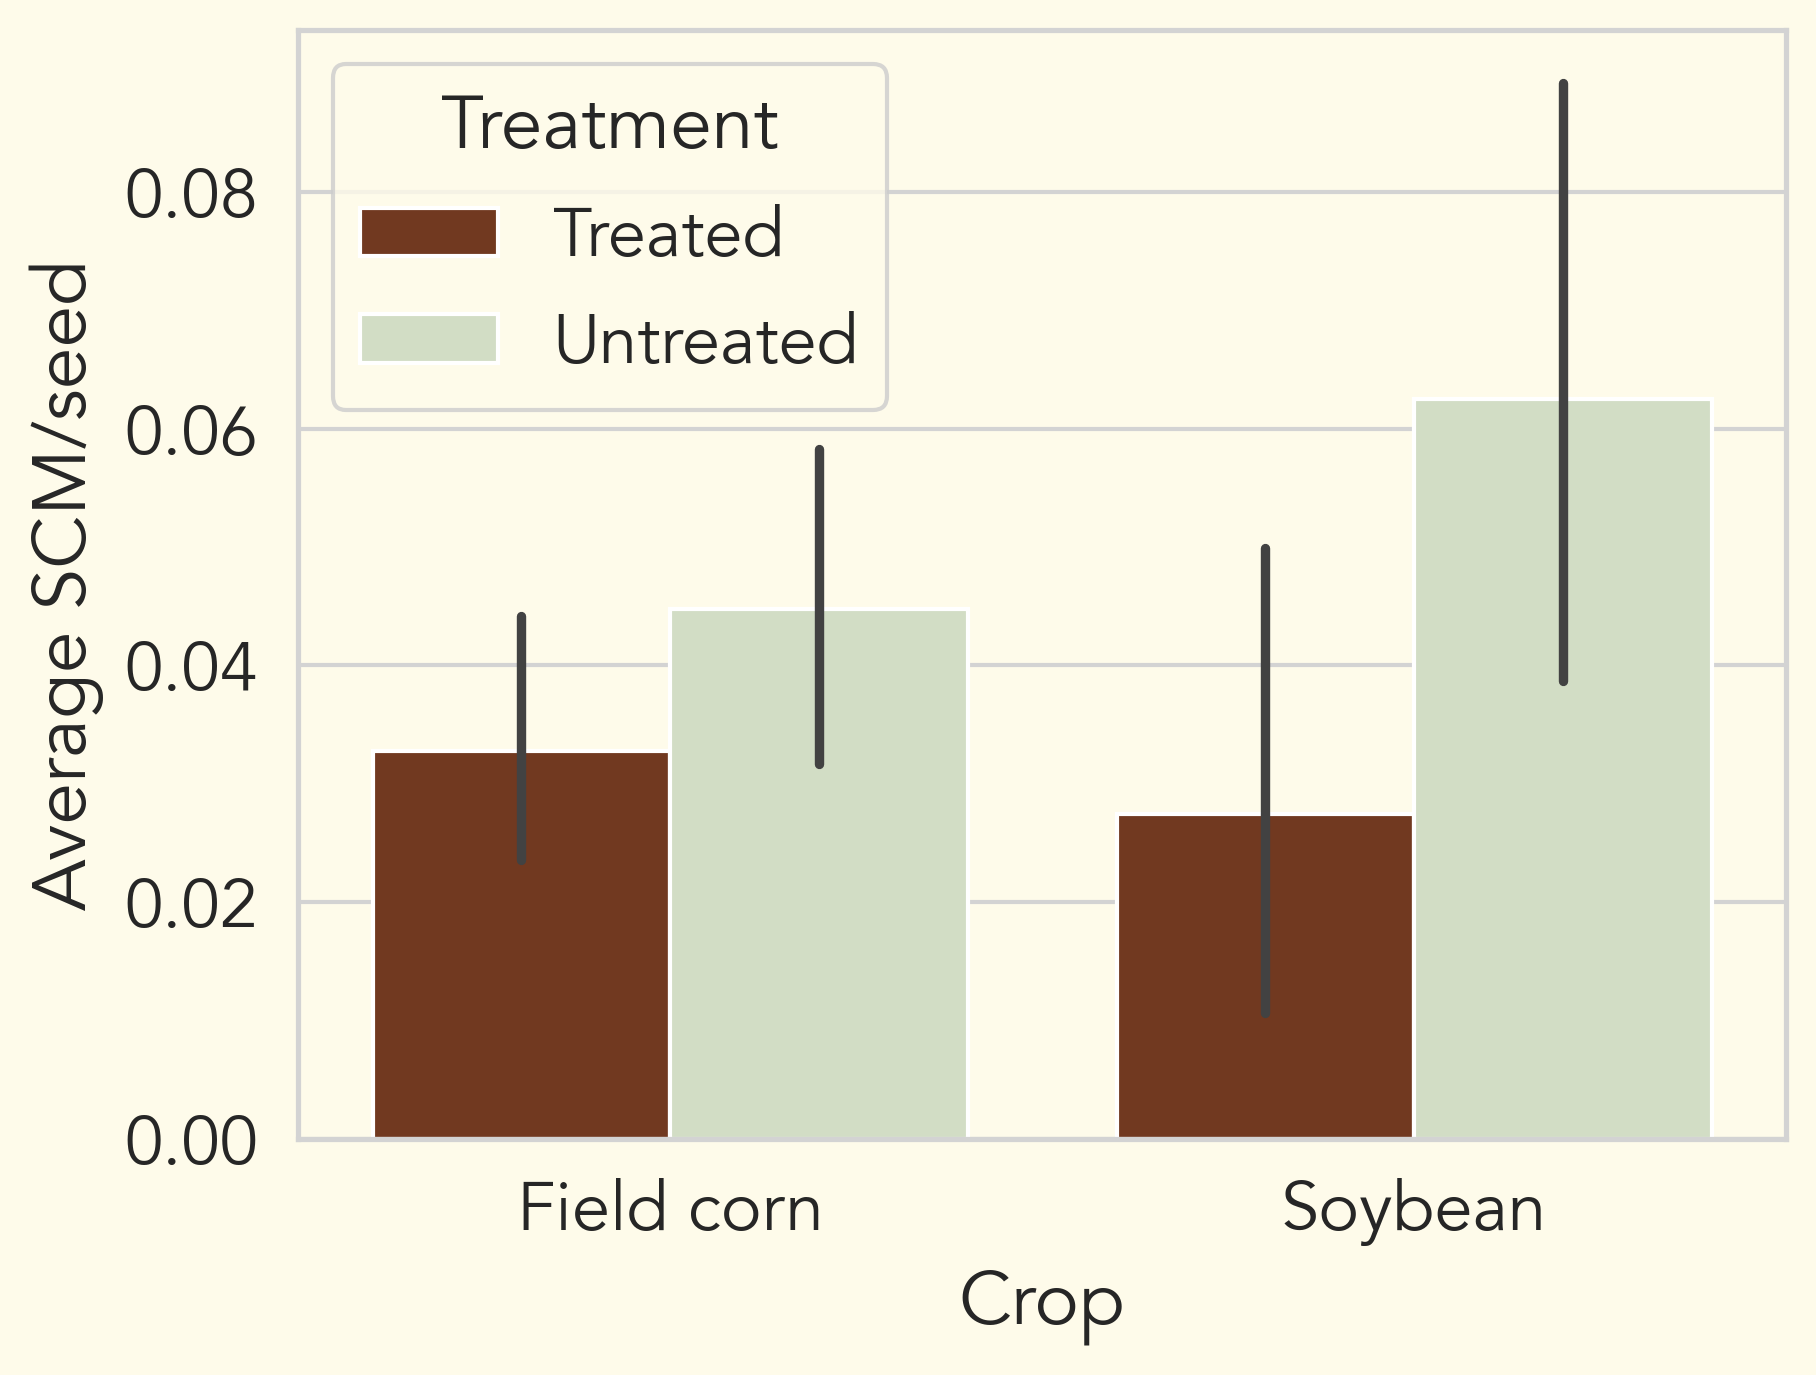

In [131]:
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'axes.facecolor':'#fefbeaff', 'figure.facecolor':'#fefbeaff', 'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

palette = ['#7e3412', '#d2e1c1']
hue_order = ['Treated', 'Untreated']
sns.barplot(data = field_deli_cup, x = 'Crop', y = 'Avg SCM', hue = 'Treatment', palette=palette, hue_order=hue_order)
plt.ylabel('Average SCM/seed')

In [223]:
veg_deli_cup = deli_cup[(deli_cup['Seed Type'] != 'FIELD CORN') & (deli_cup['Seed Type'] != 'SOY')]

veg_deli_cup['Treatment'] = veg_deli_cup['Treatment'].replace({'NEONIC': 'Treated', 'FUNG': 'Untreated'})
veg_deli_cup['Seed Type'] = veg_deli_cup['Seed Type'].replace({'SWEET CORN': 'Sweet corn', 'SNAP': 'Snap bean'})
veg_deli_cup = veg_deli_cup.rename(columns={'Seed Type': 'Crop'})

veg_deli_cup['Avg SCM'] = veg_deli_cup['Total SCM'] / veg_deli_cup['Number Seeds']


veg_deli_cup

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_51884/1349109760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veg_deli_cup['Treatment'] = veg_deli_cup['Treatment'].replace({'NEONIC': 'Treated', 'FUNG': 'Untreated'})
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_51884/1349109760.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veg_deli_cup['Seed Type'] = veg_deli_cup['Seed Type'].replace({'SWEET CORN': 'Sweet corn', 'SNAP': 'Snap bean'})


,Container Number,Container Type,Project,Field ID,Treatment,Collection Date,Crop,Number Seeds,SCM Larvae Sum,SCM Pupae Sum,...,Other Damage,Wireworms,Other Seeds,Wireworm Presence/absence,Grub presence/absence,Checked?,Ordered Entered,Notes,Total SCM,Avg SCM
233,25_D_2392,DELI,R,KIK_HAR,Untreated,6/24/25,Sweet corn,15.0,0,0,...,0,0,0,NO,NO,Y,NaN,NaN,0,0.0
234,25_D_2393,DELI,R,KIK_HAR,Untreated,6/24/25,Sweet corn,15.0,0,0,...,0,0,0,NO,NO,Y,NaN,NaN,0,0.0
235,25_D_2394,DELI,R,KIK_HAR,Untreated,6/24/25,Sweet corn,15.0,0,0,...,0,0,0,NO,NO,Y,NaN,NaN,0,0.0
236,25_D_2395,DELI,R,KIK_HAR,Untreated,6/24/25,Sweet corn,15.0,0,0,...,0,0,0,NO,NO,Y,NaN,NaN,0,0.0
237,25_D_2396,DELI,R,KIK_HAR,Untreated,6/24/25,Sweet corn,17.0,0,0,...,0,0,0,NO,YES,Y,NaN,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,25_D_2513,DELI,R,ZUE_VOT,Untreated,7/4/25,Snap bean,15.0,0,0,...,0,0,0,NO,NO,Y,712,NaN,0,0.0
982,25_D_2514,DELI,R,ZUE_VOT,Untreated,7/3/25,Snap bean,15.0,0,0,...,0,0,0,NO,NO,Y,710,NaN,0,0.0
983,25_D_2515,DELI,R,ZUE_VOT,Untreated,7/8/25,Snap bean,15.0,0,0,...,0,0,0,NO,NO,Y,716,NaN,0,0.0
984,25_D_2516,DELI,R,ZUE_VOT,Untreated,7/6/25,Snap bean,15.0,0,0,...,0,0,0,NO,NO,Y,714,NaN,0,0.0


Text(0, 0.5, 'Average SCM/seed')

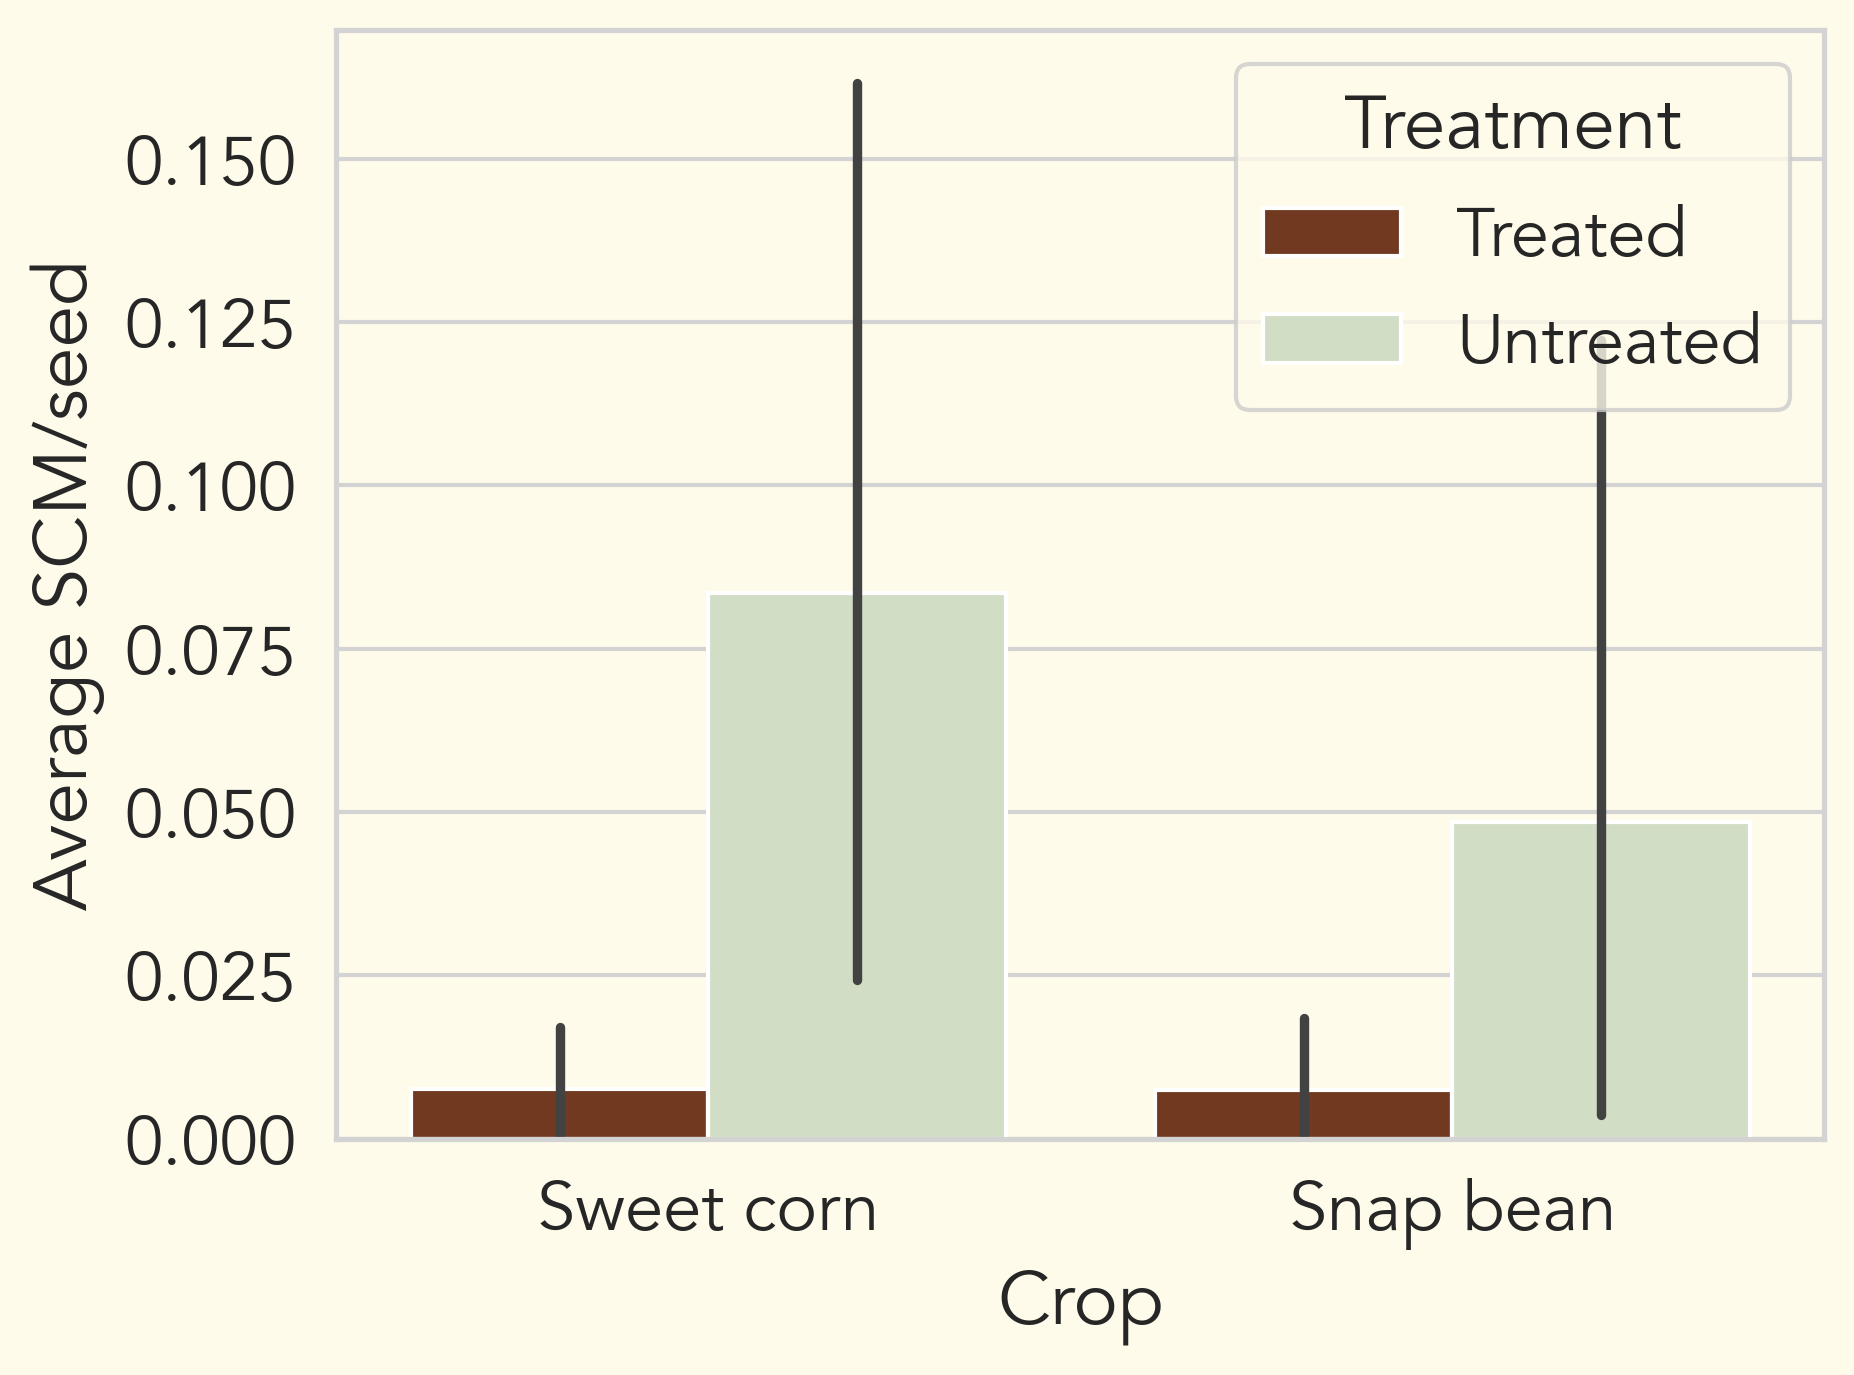

In [224]:
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'axes.facecolor':'#fefbeaff', 'figure.facecolor':'#fefbeaff', 'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

palette = ['#7e3412', '#d2e1c1']
hue_order = ['Treated', 'Untreated']
ax = sns.barplot(data = veg_deli_cup, x = 'Crop', y = 'Avg SCM', hue = 'Treatment', palette=palette, hue_order=hue_order)
#sns.swarmplot(x="Crop", y="Avg SCM", data=veg_deli_cup, color="black", hue = 'Treatment', dodge = True, size=2, alpha=0.7, hue_order=hue_order)
sns.move_legend(ax, "upper right")
plt.ylabel('Average SCM/seed')

#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[0:2], labels[0:2])


In [145]:
corn_deli = field_deli_cup[field_deli_cup['Crop'] == 'Field corn']
soy_deli = field_deli_cup[field_deli_cup['Crop'] == 'Soybean']


In [225]:
sweet_corn_deli = veg_deli_cup[veg_deli_cup['Crop'] == 'Sweet corn']
snap_deli = veg_deli_cup[veg_deli_cup['Crop'] == 'Snap bean']


In [146]:
t1 = corn_deli.loc[corn_deli['Treatment'] == 'Untreated'].groupby('Field ID')['Avg SCM'].mean()
t2 = corn_deli.loc[corn_deli['Treatment'] == 'Treated'].groupby('Field ID')['Avg SCM'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=1.2063759627417392, pvalue=0.2365160321667272, df=32)

In [227]:
t1 = sweet_corn_deli.loc[sweet_corn_deli['Treatment'] == 'Untreated'].groupby('Field ID')['Avg SCM'].mean()
t2 = sweet_corn_deli.loc[sweet_corn_deli['Treatment'] == 'Treated'].groupby('Field ID')['Avg SCM'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=1.0314699320028493, pvalue=0.37819316275215104, df=3)

In [228]:
t1 = snap_deli.loc[snap_deli['Treatment'] == 'Untreated'].groupby('Field ID')['Avg SCM'].mean()
t2 = snap_deli.loc[snap_deli['Treatment'] == 'Treated'].groupby('Field ID')['Avg SCM'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=1.0, pvalue=0.49999999999999956, df=1)

In [40]:
np.mean(corn_deli['Avg SCM'])

0.03880108362026129

In [41]:
np.mean(soy_deli['Avg SCM'])

0.04490340985697023

In [48]:
field_crop_stand = stand[(stand['Crop'] != 'Sweet corn') & (stand['Crop'] != 'Snap bean')]
field_crop_stand

,Data Collector,Field ID,Date,Sampling period,Crop,Treatment,Section number,Plant growth stage,Stand count,Notes
0,Chloe Yi-Luo Cho,CHO_GEN,6/9/2025,VE/V1,Soybean,Neonic,1,V1,88.0,NaN
1,Chloe Yi-Luo Cho,CHO_GEN,6/9/2025,VE/V1,Soybean,Neonic,2,V1,89.0,NaN
2,Chloe Yi-Luo Cho,CHO_GEN,6/9/2025,VE/V1,Soybean,Neonic,3,V1,85.0,NaN
3,Chloe Yi-Luo Cho,CHO_GEN,6/9/2025,VE/V1,Soybean,Neonic,4,V1,90.0,NaN
4,Chloe Yi-Luo Cho,CHO_GEN,6/9/2025,VE/V1,Soybean,Neonic,5,V1,94.0,NaN
...,...,...,...,...,...,...,...,...,...,...
1057,Katelyn Miller,MIL_BAR_2,8/1/2025,V3/V4,Soybean,Fung,5,V3,60.0,NaN
1058,Katelyn Miller,MIL_BAR_2,8/1/2025,V3/V4,Soybean,Fung,6,V3,40.0,NaN
1059,Katelyn Miller,MIL_BAR_2,8/1/2025,V3/V4,Soybean,Fung,7,V3,59.0,NaN
1060,Katelyn Miller,MIL_BAR_2,8/1/2025,V3/V4,Soybean,Fung,8,V3,70.0,NaN


In [180]:
veg_crop_stand = stand[(stand['Crop'] != 'Field corn') & (stand['Crop'] != 'Soybean')]
veg_crop_stand['Treatment'] = veg_crop_stand['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})

veg_crop_stand

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_51884/803008222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veg_crop_stand['Treatment'] = veg_crop_stand['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})


,Data Collector,Field ID,Date,Sampling period,Crop,Treatment,Section number,Plant growth stage,Stand count,Notes
648,Julie Kikkert,KIK_SWE,6/27/2025,VE/V1,Sweet corn,Treated,1,VE/V1,22.0,NaN
649,Julie Kikkert,KIK_SWE,6/27/2025,VE/V1,Sweet corn,Treated,2,VE/V1,22.0,NaN
650,Julie Kikkert,KIK_SWE,6/27/2025,VE/V1,Sweet corn,Treated,3,VE/V1,18.0,NaN
651,Julie Kikkert,KIK_SWE,6/27/2025,VE/V1,Sweet corn,Treated,4,VE/V1,19.0,NaN
652,Julie Kikkert,KIK_SWE,6/27/2025,VE/V1,Sweet corn,Treated,5,VE/V1,17.0,NaN
...,...,...,...,...,...,...,...,...,...,...
1111,Marion Zuefle,ZUE_MYT,7/15/2025,V3/V4,Snap bean,Untreated,5,V2/V3,65.0,NaN
1112,Marion Zuefle,ZUE_MYT,7/15/2025,V3/V4,Snap bean,Untreated,6,V2/V3,75.0,NaN
1113,Marion Zuefle,ZUE_MYT,7/15/2025,V3/V4,Snap bean,Untreated,7,V2/V3,80.0,NaN
1114,Marion Zuefle,ZUE_MYT,7/15/2025,V3/V4,Snap bean,Untreated,8,V2/V3,85.0,NaN


In [181]:
sweet_corn_stand = veg_crop_stand[veg_crop_stand['Crop'] == 'Sweet corn']
snap_stand = veg_crop_stand[veg_crop_stand['Crop'] == 'Snap bean']


In [185]:
t1 = sweet_corn_stand.loc[sweet_corn_stand['Treatment'] == 'Untreated'].groupby('Field ID')['Stand count'].mean()
t2 = sweet_corn_stand.loc[sweet_corn_stand['Treatment'] == 'Treated'].groupby('Field ID')['Stand count'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=2.0192031121345106, pvalue=0.13676140865767591, df=3)

In [186]:
t1 = snap_stand.loc[snap_stand['Treatment'] == 'Untreated'].groupby('Field ID')['Stand count'].mean()
t2 = snap_stand.loc[snap_stand['Treatment'] == 'Treated'].groupby('Field ID')['Stand count'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=-0.13646055437100207, pvalue=0.9136598048070722, df=1)

Text(0, 0.5, 'Stand count')

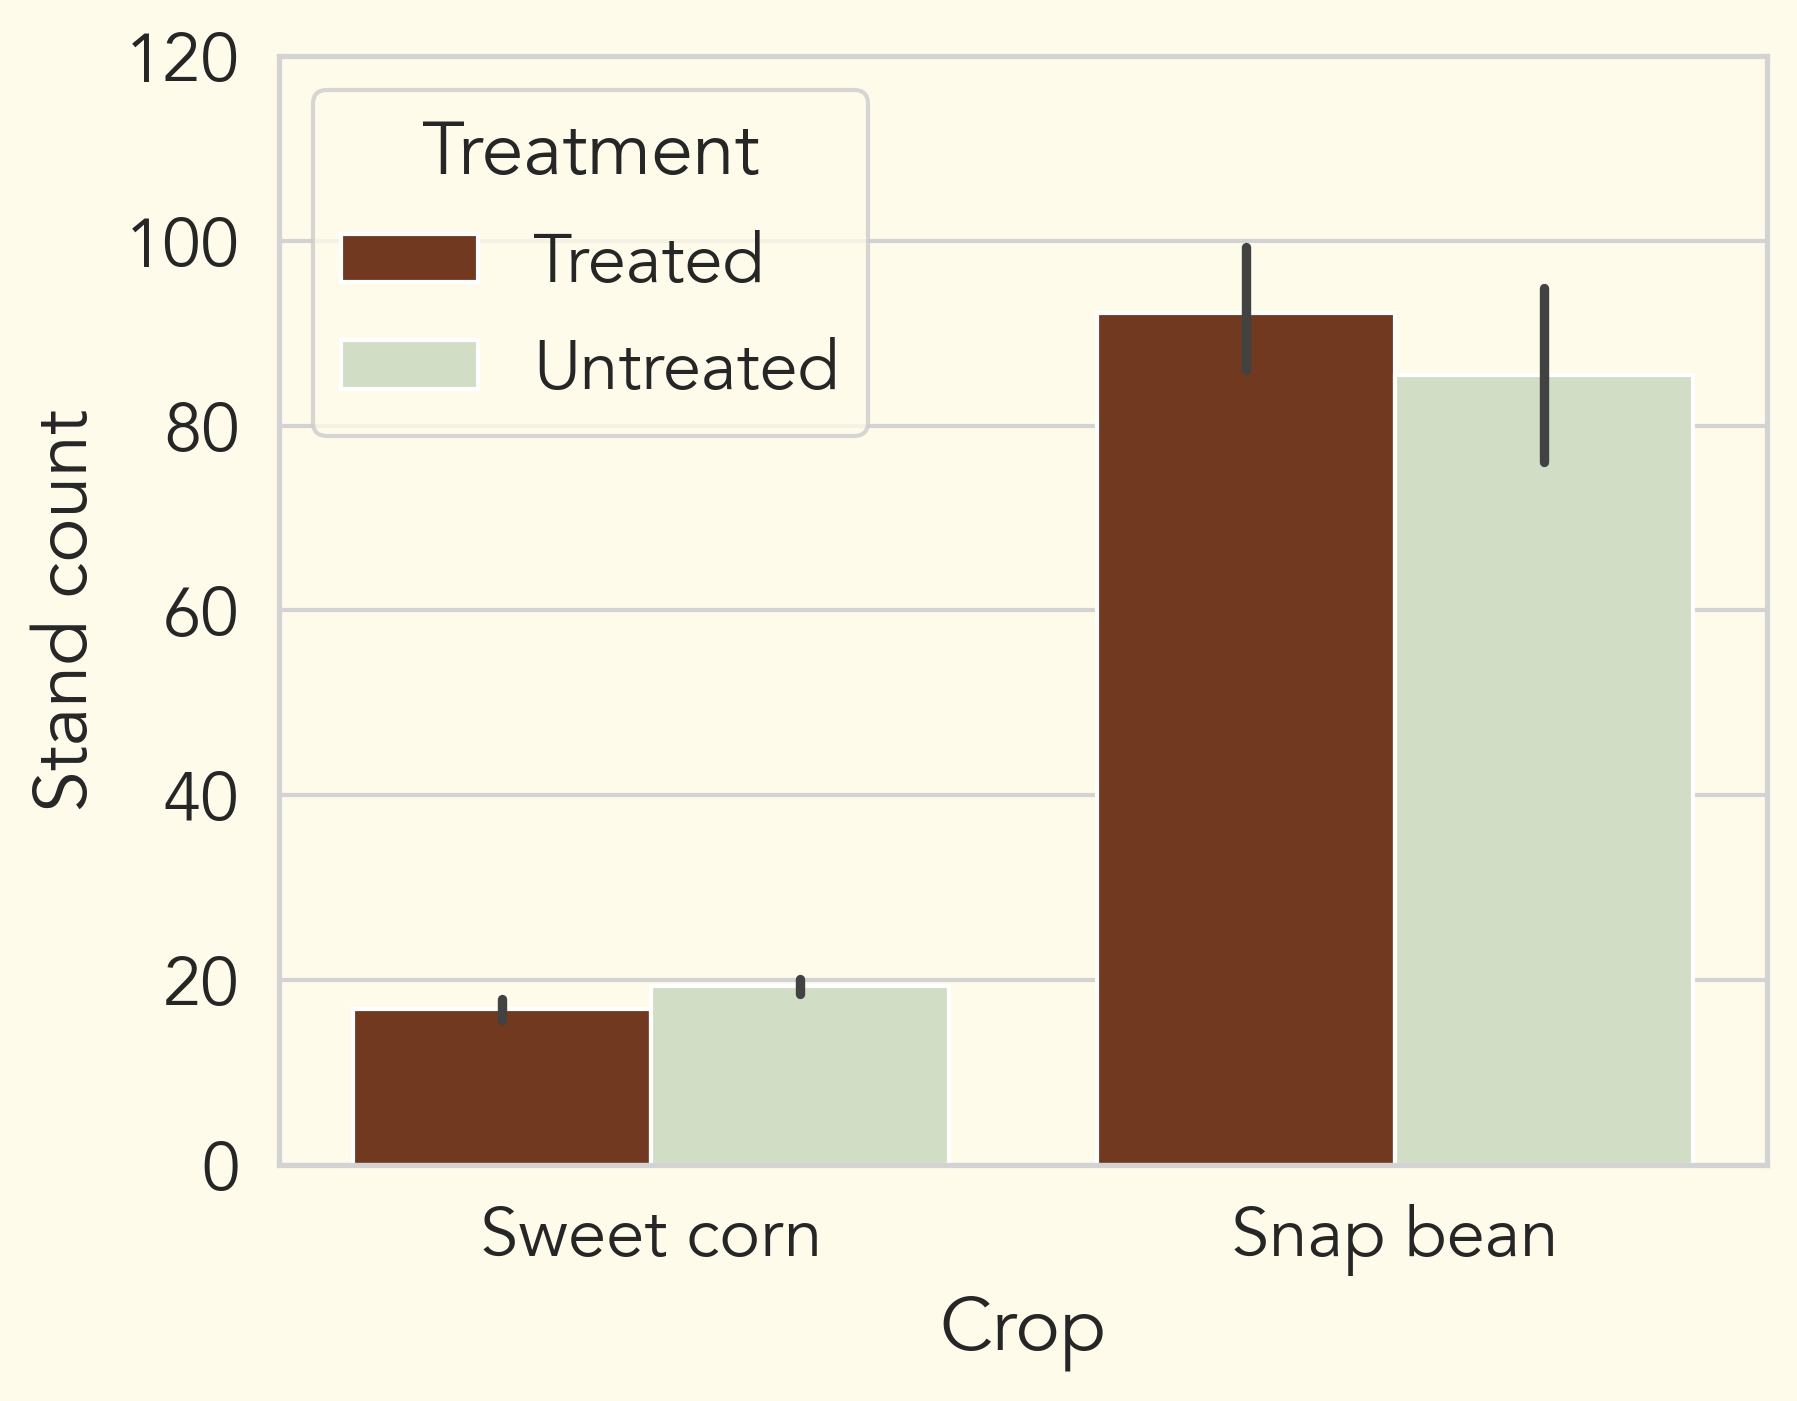

In [187]:
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'axes.facecolor':'#fefbeaff', 'figure.facecolor':'#fefbeaff', 'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

palette = ['#7e3412', '#d2e1c1']
hue_order = ['Treated', 'Untreated']
ax = sns.barplot(data = veg_crop_stand, x = 'Crop', y = 'Stand count', hue = 'Treatment', palette=palette, hue_order=hue_order)
ax.set_ylim(0, 120)
plt.ylabel('Stand count')

In [68]:
len(field_crop_stand.loc[field_crop_stand['Crop'] == 'Soybean']['Field ID'].unique())

11

In [69]:
len(field_crop_stand.loc[field_crop_stand['Crop'] == 'Field corn']['Field ID'].unique())

18

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_51884/945512122.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_crop_stand['Treatment'] = field_crop_stand['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})


(0.0, 120.0)

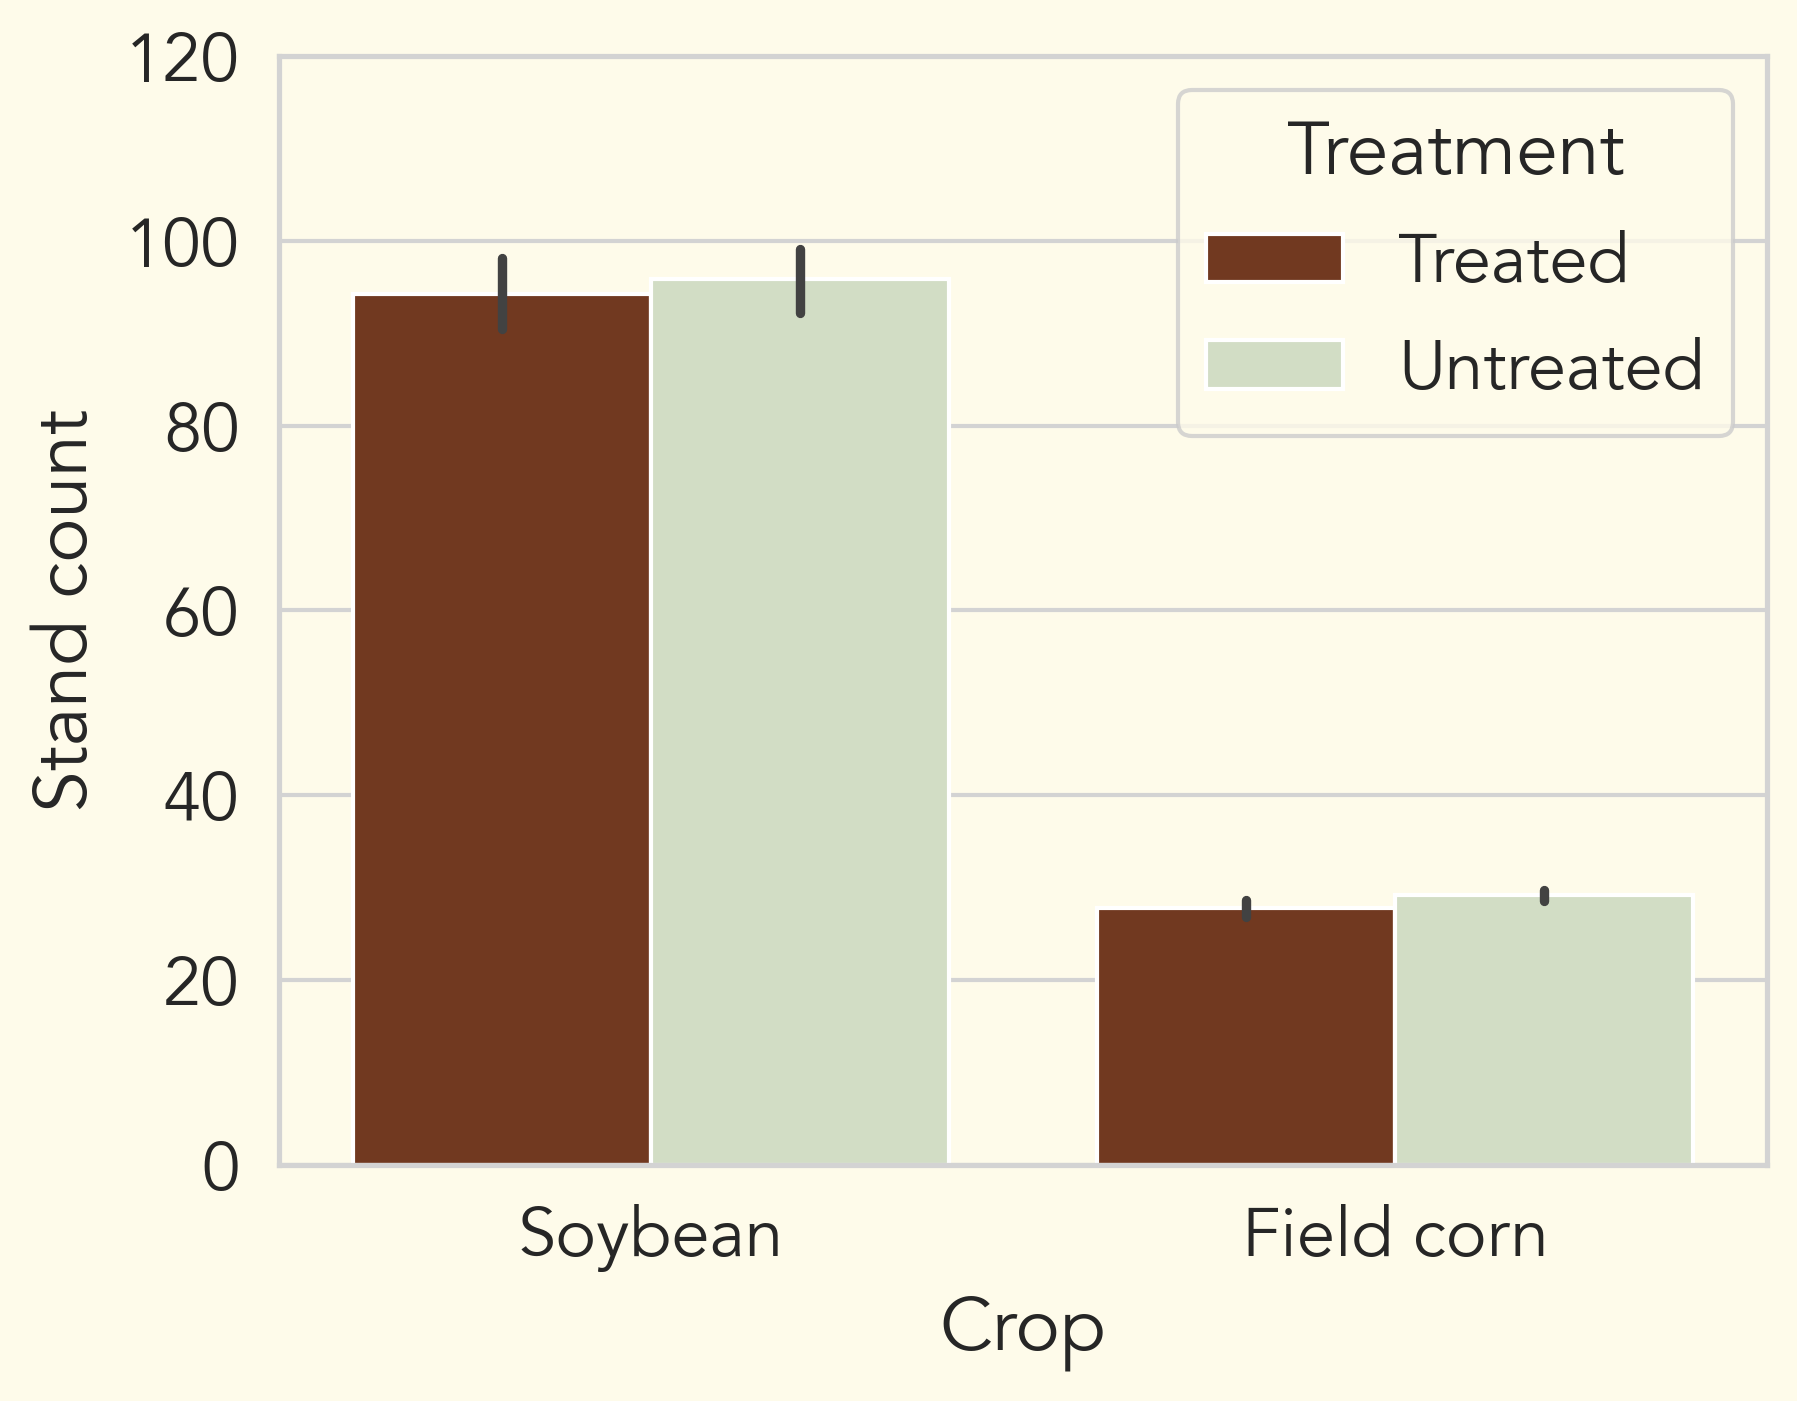

In [50]:
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'axes.facecolor':'#fefbeaff', 'figure.facecolor':'#fefbeaff', 'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

field_crop_stand['Treatment'] = field_crop_stand['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})


palette = ['#7e3412', '#d2e1c1']
hue_order = ['Treated', 'Untreated']
sns.barplot(data = field_crop_stand, x = 'Crop', y = 'Stand count', hue = 'Treatment', palette=palette, hue_order=hue_order)
plt.ylim(0, 120)


In [152]:
corn_stand = stand[stand['Crop'] == 'Field corn']
soy_stand = stand[stand['Crop'] == 'Soybean']


In [156]:
t1 = corn_stand.loc[corn_stand['Treatment'] == 'Fung'].groupby('Field ID')['Stand count'].mean()
t2 = corn_stand.loc[corn_stand['Treatment'] == 'Neonic'].groupby('Field ID')['Stand count'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=1.0191955835769415, pvalue=0.3223963958179611, df=17)

In [157]:
t1 = soy_stand.loc[soy_stand['Treatment'] == 'Fung'].groupby('Field ID')['Stand count'].mean()
t2 = soy_stand.loc[soy_stand['Treatment'] == 'Neonic'].groupby('Field ID')['Stand count'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=-0.16490576062443194, pvalue=0.8723040033301315, df=10)

<Axes: xlabel='Treatment', ylabel='Stand count'>

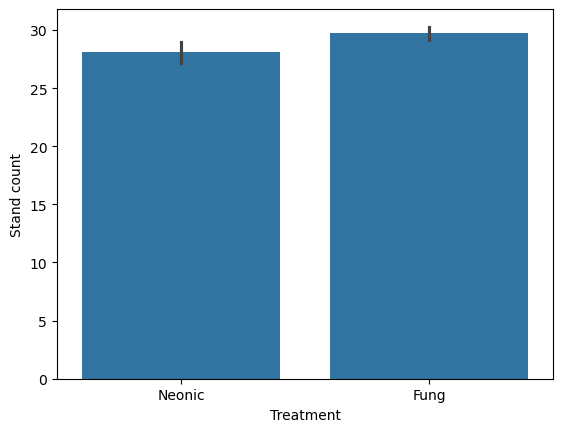

In [16]:
sns.barplot(data = corn_stand, x = 'Treatment', y = 'Stand count')

<Axes: xlabel='Treatment', ylabel='Total weight (g)'>

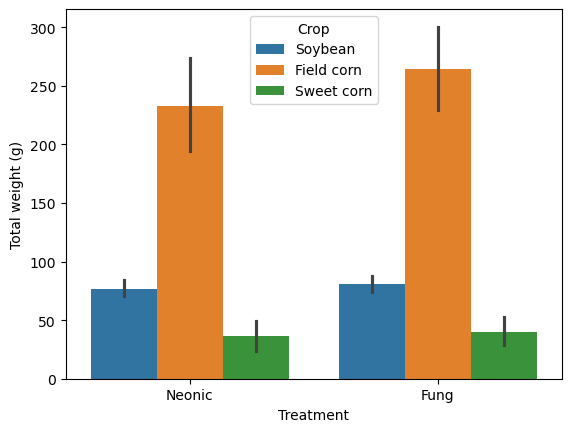

In [18]:
sns.barplot(data = biomass, x = 'Treatment', y = 'Total weight (g)', hue = 'Crop')

In [55]:
corn_biomass = biomass[biomass['Crop'] == 'Field corn']
soy_biomass = biomass[biomass['Crop'] == 'Soybean']


In [158]:
t1 = corn_biomass.loc[corn_biomass['Treatment'] == 'Fung'].groupby('Field ID')['Total weight (g)'].mean()
t2 = corn_biomass.loc[corn_biomass['Treatment'] == 'Neonic'].groupby('Field ID')['Total weight (g)'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=2.058979583641813, pvalue=0.05515557159711521, df=17)

In [159]:
t1 = soy_biomass.loc[soy_biomass['Treatment'] == 'Fung'].groupby('Field ID')['Total weight (g)'].mean()
t2 = soy_biomass.loc[soy_biomass['Treatment'] == 'Neonic'].groupby('Field ID')['Total weight (g)'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=0.2539626902971331, pvalue=0.8046698817957985, df=10)

In [58]:
field_crop_biomass = biomass[(biomass['Crop'] != 'Sweet corn') & (biomass['Crop'] != 'Snap bean')]
field_crop_biomass

,Data Collector,Field ID,Date,Sampling period,Crop,Treatment,Section number,Plant growth stage,Number of plants,Total weight (g),Notes,Untared weight (g)
0,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,1,V3,15,79.7,NaN,NaN
1,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,2,V3,15,73.8,NaN,NaN
2,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,3,V3,15,73.4,NaN,NaN
3,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,4,V3,15,78.6,NaN,NaN
4,Chloe Yi-Luo Cho,CHO_GEN,6/27/2025,V3/V4,Soybean,Neonic,5,V3,15,97.7,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
589,Katelyn Miller,MIL_BAR_2,8/1/2025,V3/V4,Soybean,Fung,5,V3,15,63.0,NaN,NaN
590,Katelyn Miller,MIL_BAR_2,8/1/2025,V3/V4,Soybean,Fung,6,V3,15,58.0,NaN,NaN
591,Katelyn Miller,MIL_BAR_2,8/1/2025,V3/V4,Soybean,Fung,7,V3,15,68.0,NaN,NaN
592,Katelyn Miller,MIL_BAR_2,8/1/2025,V3/V4,Soybean,Fung,8,V3,15,54.0,NaN,NaN


In [65]:
len(field_crop_biomass.loc[field_crop_biomass['Crop'] == 'Soybean']['Field ID'].unique())

11

In [67]:
len(field_crop_biomass.loc[field_crop_biomass['Crop'] == 'Field corn']['Field ID'].unique())

18

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_51884/1454366004.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_crop_biomass['Treatment'] = field_crop_biomass['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_51884/1454366004.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_crop_biomass['Avg weight'] = field_crop_biomass['Total weight (g)'] / field_crop_biomass['Number of plants']


Text(0, 0.5, 'Average weight/plant (g)')

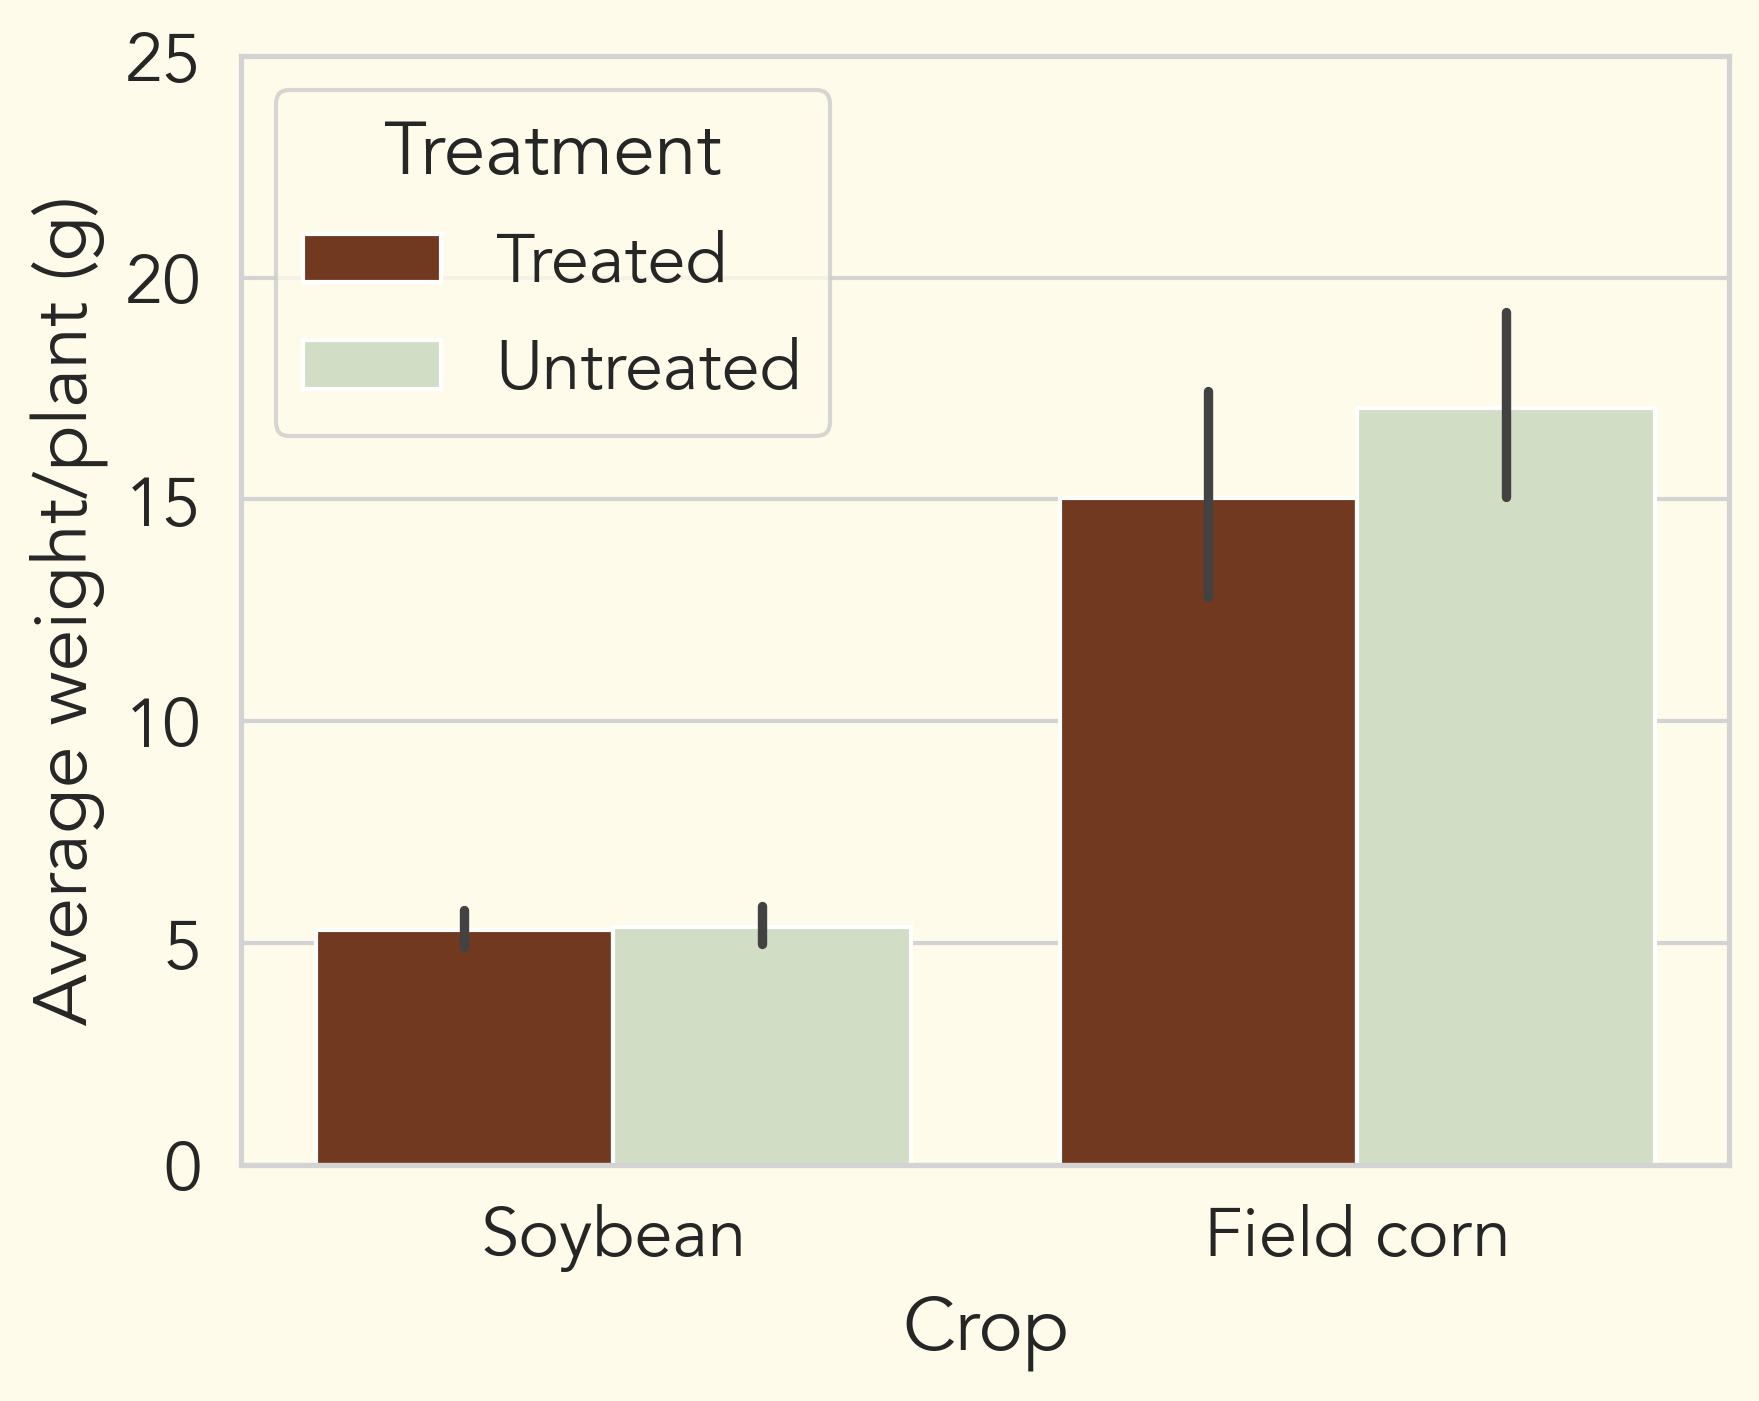

In [59]:
sns.set(font="Avenir", font_scale=1.5, rc={'axes.facecolor':'#fefbeaff', 'figure.facecolor':'#fefbeaff', 'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})
plt.rcParams.update({"figure.dpi": 300})


field_crop_biomass['Treatment'] = field_crop_biomass['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
field_crop_biomass['Avg weight'] = field_crop_biomass['Total weight (g)'] / field_crop_biomass['Number of plants']


palette = ['#7e3412', '#d2e1c1']
hue_order = ['Treated', 'Untreated']
sns.barplot(data = field_crop_biomass, x = 'Crop', y = 'Avg weight', hue = 'Treatment', palette=palette, hue_order=hue_order)
plt.ylim(0, 25)
plt.ylabel('Average weight/plant (g)')


In [80]:
sweet_corn_yield['Treatment'] = sweet_corn_yield['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
sweet_corn_yield


,Data Collector,Field ID,Date,Sampling period,Treatment,Section,Ears,Total weight (kg),Number of Plants,Notes
0,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Treated,1,19,9.98,27,NaN
1,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Treated,2,16,6.18,18,NaN
2,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Treated,3,16,7.32,15,NaN
3,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Treated,4,21,9.64,19,NaN
4,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Treated,5,18,8.10,20,NaN
5,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Treated,6,19,8.34,18,NaN
6,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Untreated,1,22,7.28,22,NaN
7,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Untreated,2,21,7.56,24,NaN
8,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Untreated,3,18,5.72,21,NaN
9,Julie Kikkert,KIK_MYT,8/26/2025,Harvest,Untreated,4,18,5.46,21,NaN


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_51884/176281499.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = sweet_corn_yield, x = 'Treatment', y = 'Ears', palette=palette)


Text(0, 0.5, 'Number of ears')

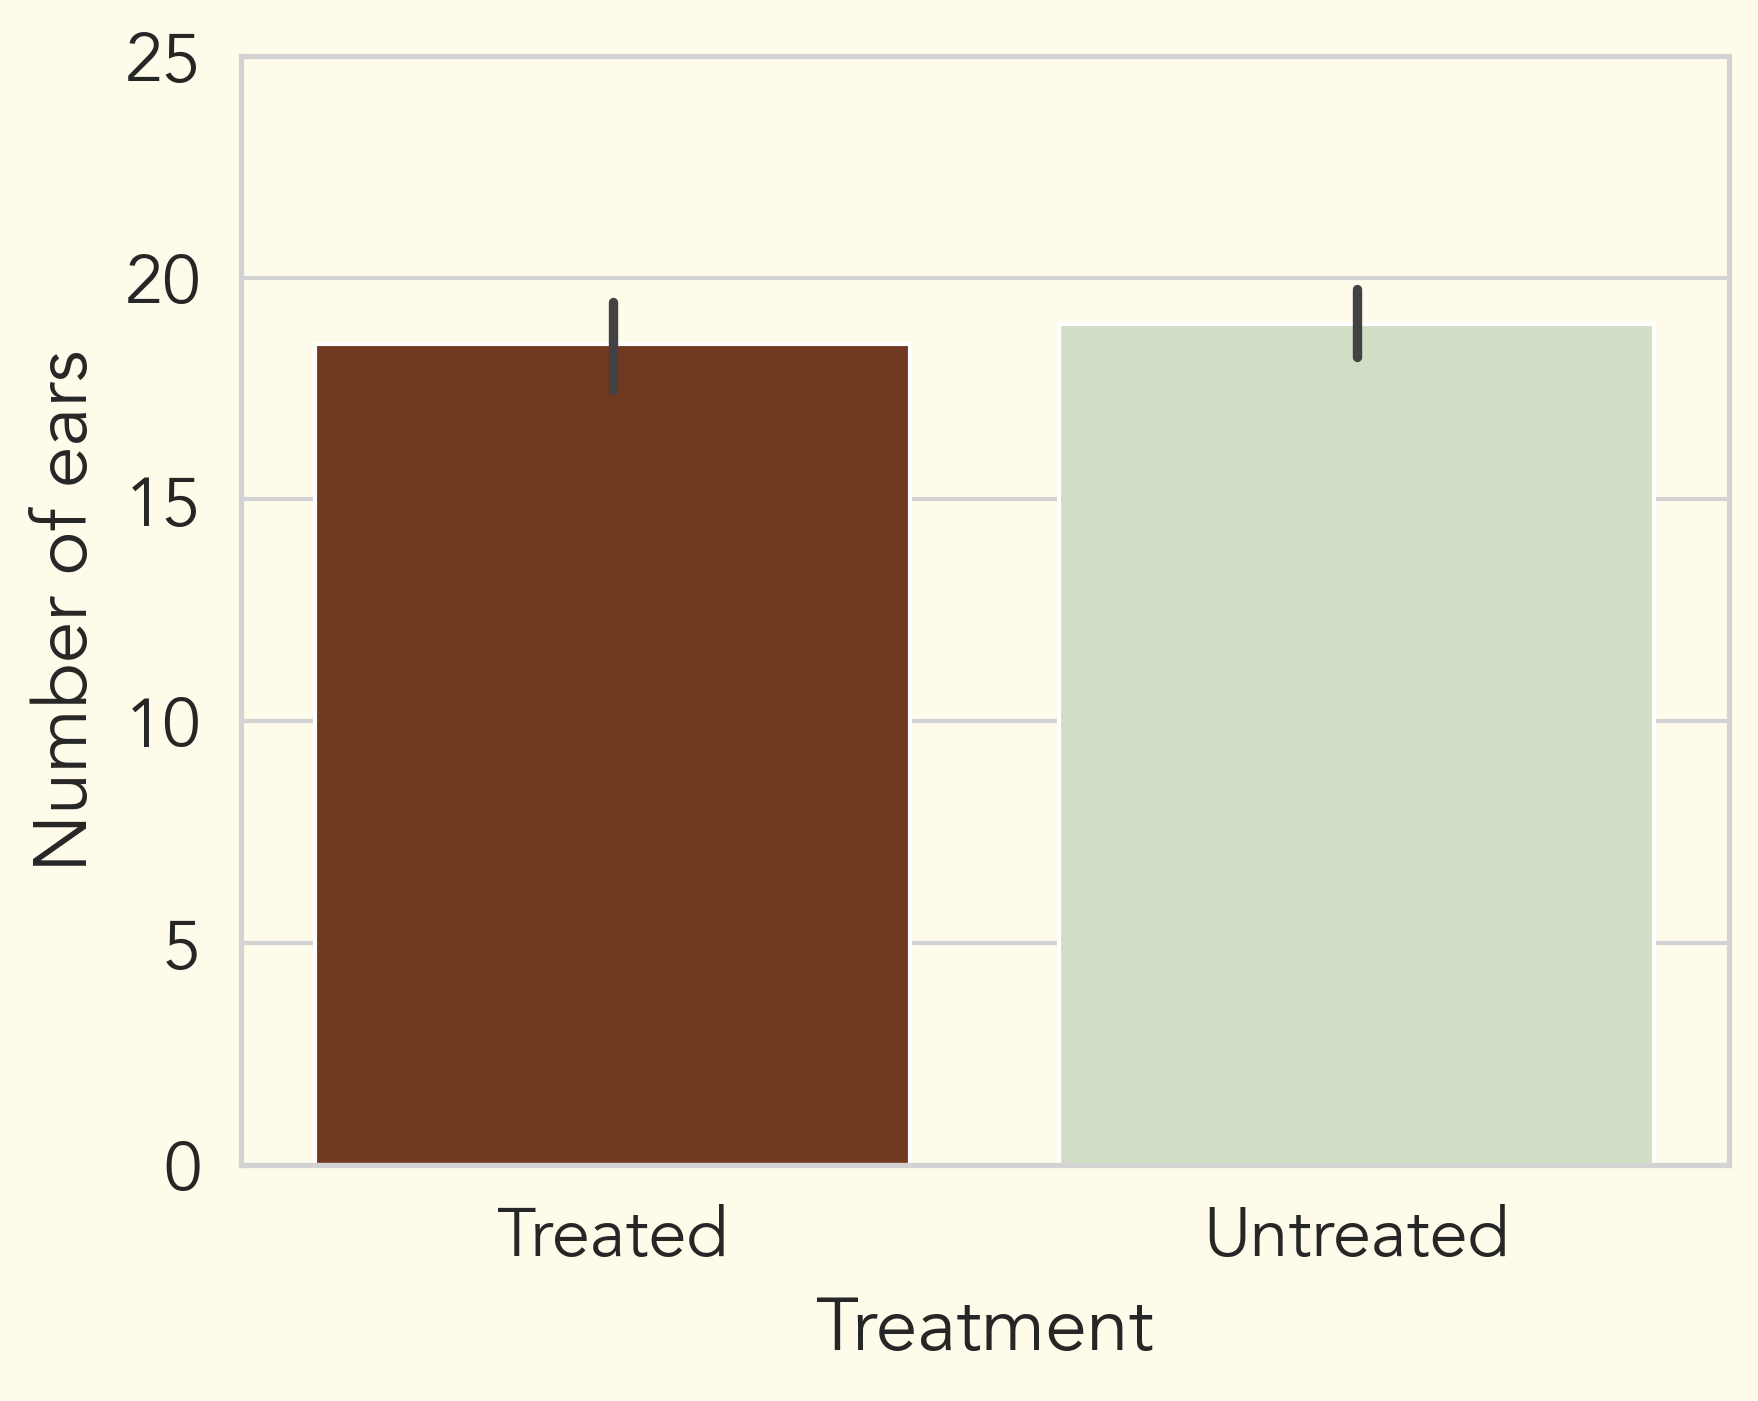

In [170]:
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'axes.facecolor':'#fefbeaff', 'figure.facecolor':'#fefbeaff', 'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

palette = ['#7e3412', '#d2e1c1']
ax = sns.barplot(data = sweet_corn_yield, x = 'Treatment', y = 'Ears', palette=palette)
ax.set_ylim(0,25)
plt.ylabel('Number of ears')

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_51884/2216716848.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sweet_corn_yield, x = 'Treatment', y = 'Total weight (kg)', palette=palette)


Text(0, 0.5, 'Total weight (kg)')

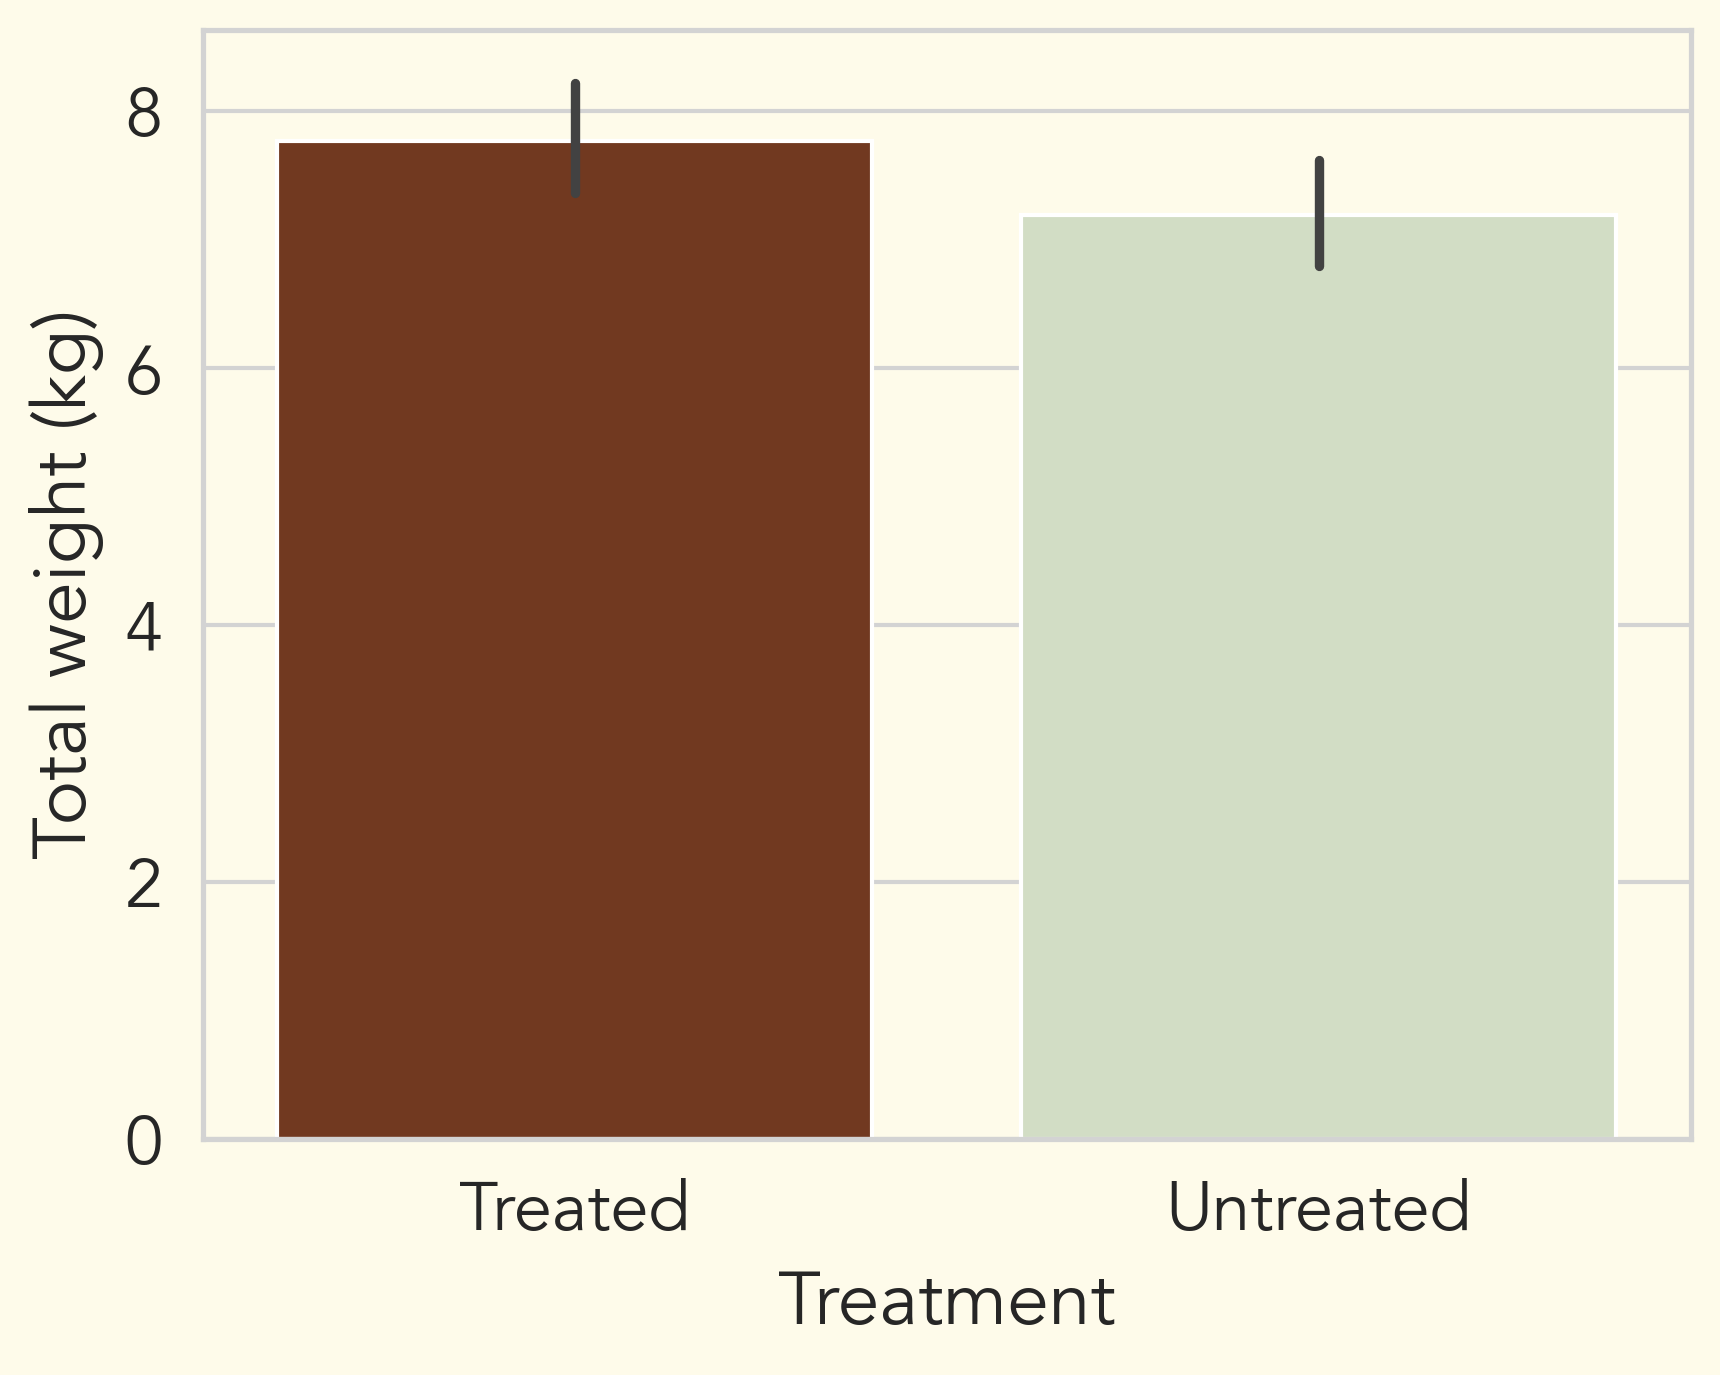

In [93]:
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'axes.facecolor':'#fefbeaff', 'figure.facecolor':'#fefbeaff', 'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

palette = ['#7e3412', '#d2e1c1']
sns.barplot(data = sweet_corn_yield, x = 'Treatment', y = 'Total weight (kg)', palette=palette)
plt.ylabel('Total weight (kg)')

In [163]:
sweet_corn_yield['Avg weight (kg)'] = sweet_corn_yield['Total weight (kg)'] / sweet_corn_yield["Ears"]

In [161]:
t1 = sweet_corn_yield.loc[sweet_corn_yield['Treatment'] == 'Treated'].groupby('Field ID')['Ears'].mean()
t2 = sweet_corn_yield.loc[sweet_corn_yield['Treatment'] == 'Untreated'].groupby('Field ID')['Ears'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=-0.4758680547060367, pvalue=0.6666745323691353, df=3)

In [86]:
t1 = sweet_corn_yield.loc[sweet_corn_yield['Treatment'] == 'Treated'].groupby('Field ID')['Total weight (kg)'].mean()
t2 = sweet_corn_yield.loc[sweet_corn_yield['Treatment'] == 'Untreated'].groupby('Field ID')['Total weight (kg)'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=1.9244042471298033, pvalue=0.06050260296972056, df=46.0)

In [164]:
t1 = sweet_corn_yield.loc[sweet_corn_yield['Treatment'] == 'Treated'].groupby('Field ID')['Avg weight (kg)'].mean()
t2 = sweet_corn_yield.loc[sweet_corn_yield['Treatment'] == 'Untreated'].groupby('Field ID')['Avg weight (kg)'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=1.4192645840294138, pvalue=0.25088261769485326, df=3)

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_51884/450050465.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = sweet_corn_yield, x = 'Treatment', y = 'Avg weight (kg)', palette=palette)


Text(0, 0.5, 'Avg weight per ear (kg)')

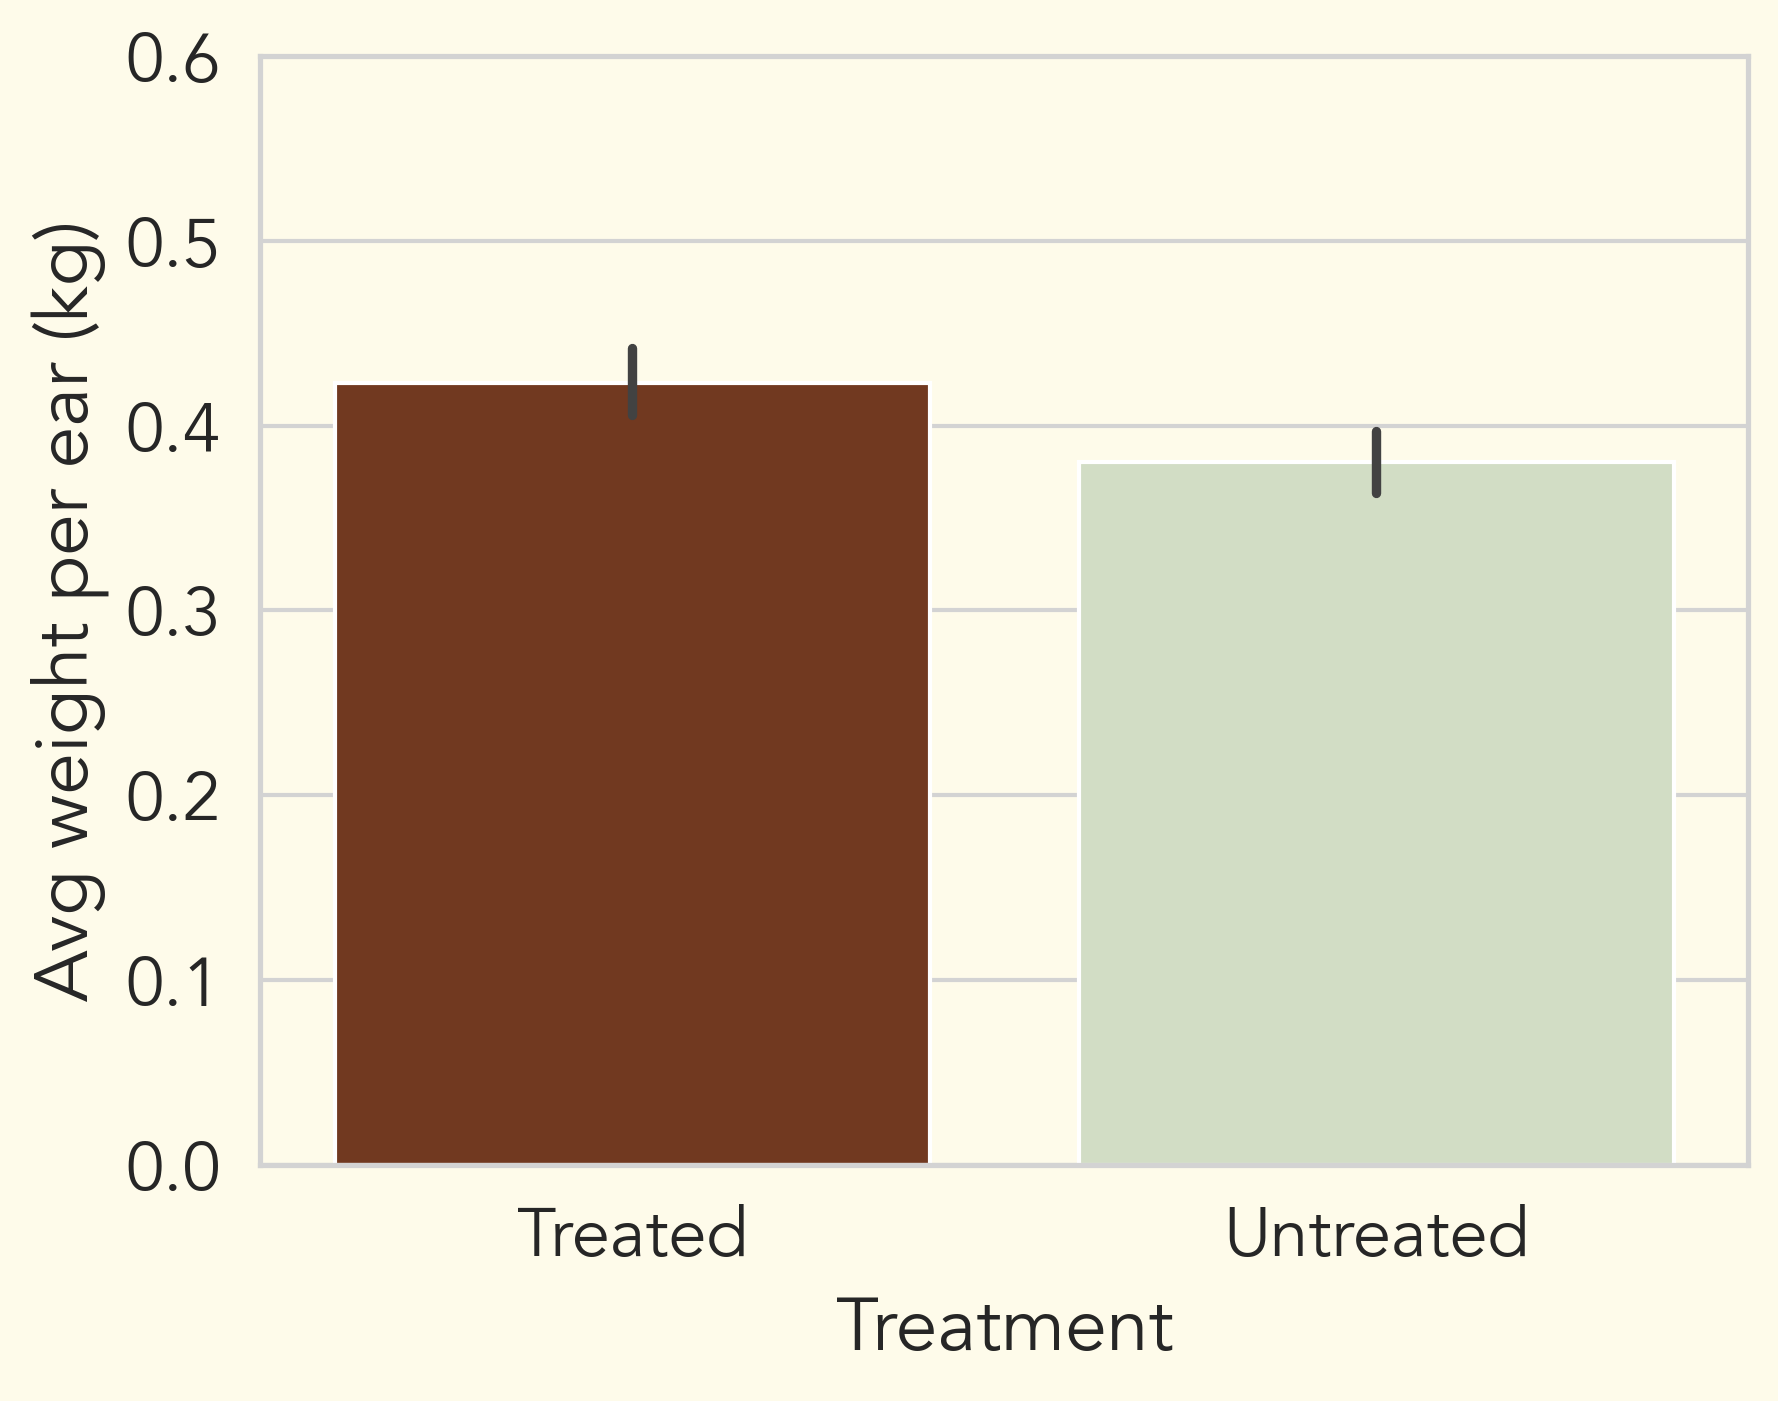

In [172]:
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'axes.facecolor':'#fefbeaff', 'figure.facecolor':'#fefbeaff', 'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

palette = ['#7e3412', '#d2e1c1']
ax = sns.barplot(data = sweet_corn_yield, x = 'Treatment', y = 'Avg weight (kg)', palette=palette)
ax.set_ylim(0, 0.6)
plt.ylabel('Avg weight per ear (kg)')

In [85]:
snap_yield['Treatment'] = snap_yield['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
snap_yield


,Data Collector,Field ID,Date,Sampling period,Treatment,Section,Number of Pods,Total weight (kg),Number of Plants,Notes
0,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Treated,1,856,1.40,110,NaN
1,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Treated,2,783,1.50,115,NaN
2,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Treated,3,896,1.76,114,NaN
3,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Treated,4,907,1.86,96,NaN
4,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Treated,5,644,0.94,106,NaN
5,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Treated,6,483,0.94,104,NaN
6,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Untreated,1,416,1.04,43,NaN
7,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Untreated,2,661,1.42,69,NaN
8,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Untreated,3,441,0.64,59,NaN
9,Marion Zuefle,ZUE_MYT,8/12/2025,Harvest,Untreated,4,370,0.75,61,NaN


In [166]:
t1 = snap_yield.loc[snap_yield['Treatment'] == 'Treated'].groupby('Field ID')['Number of Pods'].mean()
t2 = snap_yield.loc[snap_yield['Treatment'] == 'Untreated'].groupby('Field ID')['Number of Pods'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=-0.5508462104488594, pvalue=0.6794666170846619, df=1)

In [167]:
t1 = snap_yield.loc[snap_yield['Treatment'] == 'Treated'].groupby('Field ID')['Total weight (kg)'].mean()
t2 = snap_yield.loc[snap_yield['Treatment'] == 'Untreated'].groupby('Field ID')['Total weight (kg)'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=-0.7384083044982698, pvalue=0.5950836893399938, df=1)

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_51884/1263157783.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = snap_yield, x = 'Treatment', y = 'Total weight (kg)', palette=palette)


Text(0, 0.5, 'Total weight (kg)')

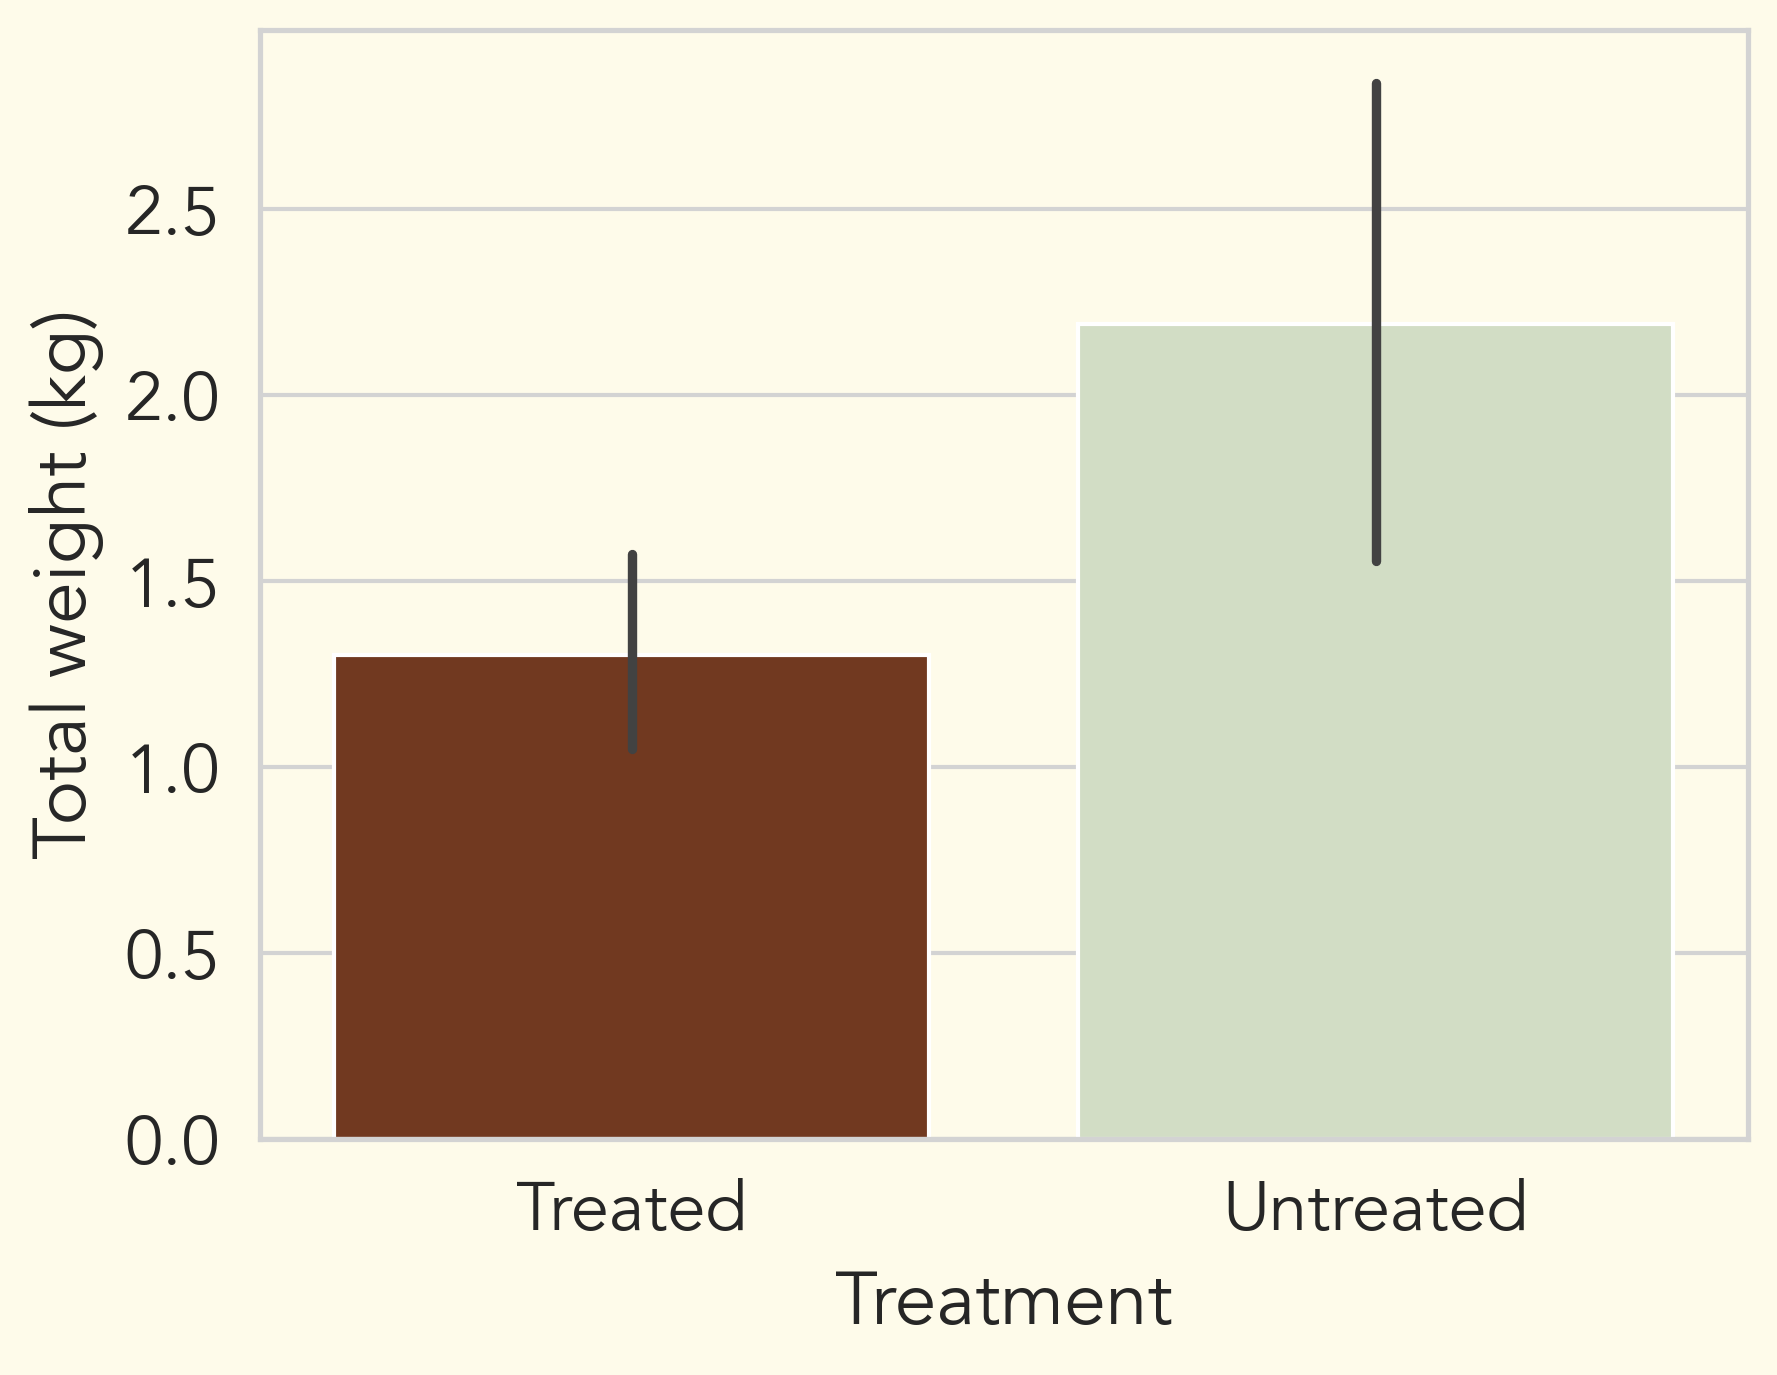

In [173]:
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'axes.facecolor':'#fefbeaff', 'figure.facecolor':'#fefbeaff', 'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

palette = ['#7e3412', '#d2e1c1']
sns.barplot(data = snap_yield, x = 'Treatment', y = 'Total weight (kg)', palette=palette)
plt.ylabel('Total weight (kg)')

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_51884/3153162828.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = snap_yield, x = 'Treatment', y = 'Number of Pods', palette=palette)


Text(0, 0.5, 'Number of pods')

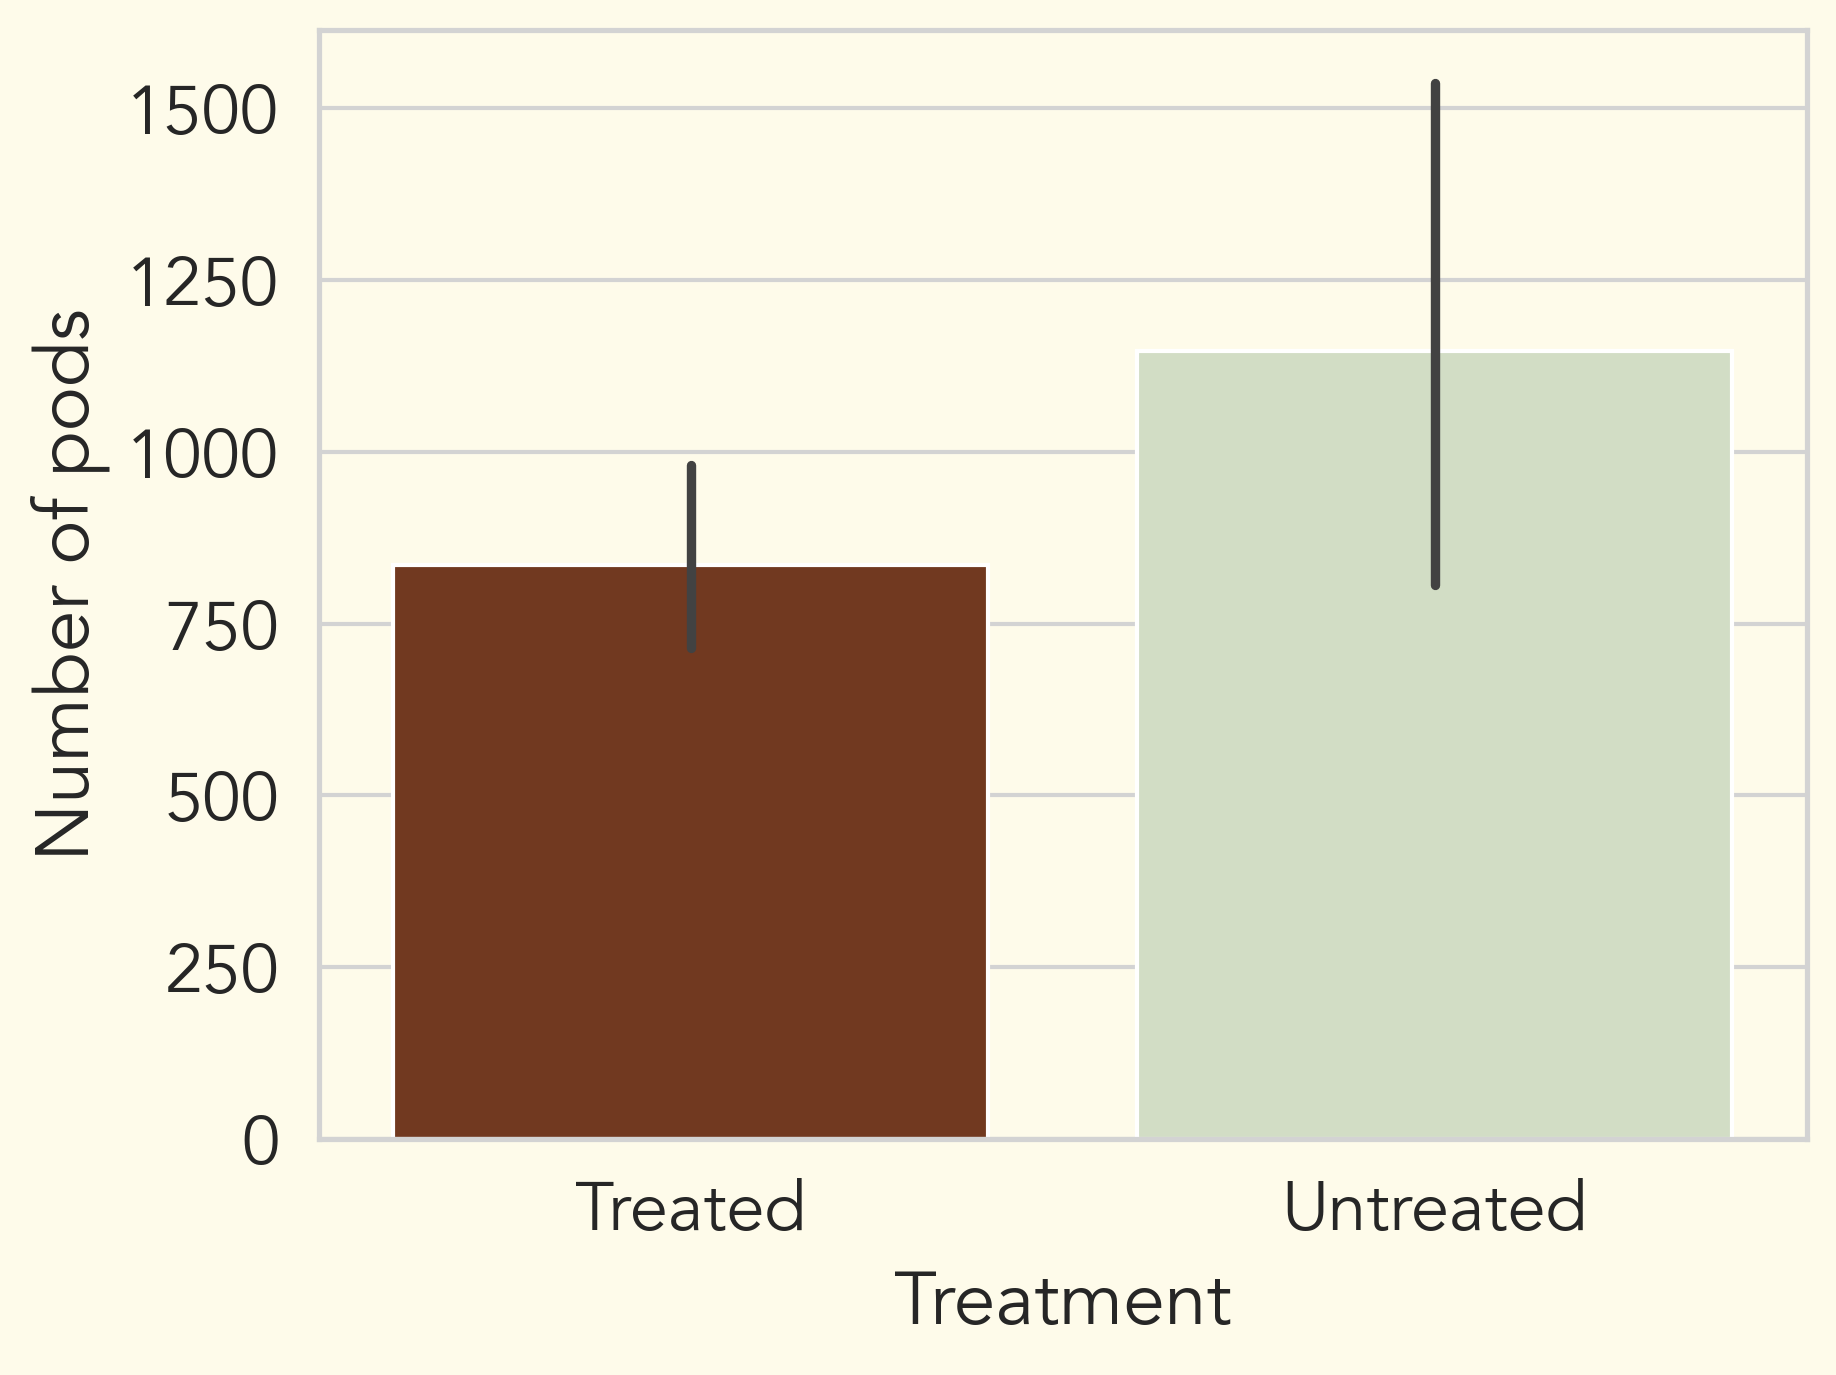

In [174]:
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'axes.facecolor':'#fefbeaff', 'figure.facecolor':'#fefbeaff', 'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

palette = ['#7e3412', '#d2e1c1']
sns.barplot(data = snap_yield, x = 'Treatment', y = 'Number of Pods', palette=palette)
plt.ylabel('Number of pods')

In [193]:
veg_crop_biomass = biomass[(biomass['Crop'] != 'Field corn') & (biomass['Crop'] != 'Soybean')]
veg_crop_biomass['Avg weight'] = veg_crop_biomass['Total weight (g)'] / veg_crop_biomass['Number of plants']
veg_crop_biomass['Treatment'] = veg_crop_biomass['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})


veg_crop_biomass

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_51884/275178147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veg_crop_biomass['Avg weight'] = veg_crop_biomass['Total weight (g)'] / veg_crop_biomass['Number of plants']
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_51884/275178147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veg_crop_biomass['Treatment'] = veg_crop_biomass['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})


,Data Collector,Field ID,Date,Sampling period,Crop,Treatment,Section number,Plant growth stage,Number of plants,Total weight (g),Notes,Untared weight (g),Avg weight
324,Julie Kikkert,KIK_SWE,7/3/2025,V3/V4,Sweet corn,Treated,1,V2/V3,15,19.01,Adjust for 7.59g bag,26.60,1.267333
325,Julie Kikkert,KIK_SWE,7/3/2025,V3/V4,Sweet corn,Treated,2,V2/V3,15,31.51,Adjust for 7.59g bag,39.10,2.100667
326,Julie Kikkert,KIK_SWE,7/3/2025,V3/V4,Sweet corn,Treated,3,V2/V3,15,21.91,Adjust for 7.59g bag,29.50,1.460667
327,Julie Kikkert,KIK_SWE,7/3/2025,V3/V4,Sweet corn,Treated,4,V2/V3,15,18.11,Adjust for 7.59g bag,25.70,1.207333
328,Julie Kikkert,KIK_SWE,7/3/2025,V3/V4,Sweet corn,Treated,5,V2/V3,15,11.71,Adjust for 7.59g bag,19.30,0.780667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,Marion Zuefle,ZUE_MYT,7/15/2025,V3/V4,Snap bean,Untreated,5,V2/V3,15,92.24,Corrected for 7.59 g bag,99.83,6.149333
626,Marion Zuefle,ZUE_MYT,7/15/2025,V3/V4,Snap bean,Untreated,6,V2/V3,15,131.41,Corrected for 7.59 g bag,139.00,8.760667
627,Marion Zuefle,ZUE_MYT,7/15/2025,V3/V4,Snap bean,Untreated,7,V2/V3,15,116.41,Corrected for 7.59 g bag,124.00,7.760667
628,Marion Zuefle,ZUE_MYT,7/15/2025,V3/V4,Snap bean,Untreated,8,V2/V3,15,125.60,Corrected for 7.59 g bag,133.19,8.373333


Text(0, 0.5, 'Average weight/plant (g)')

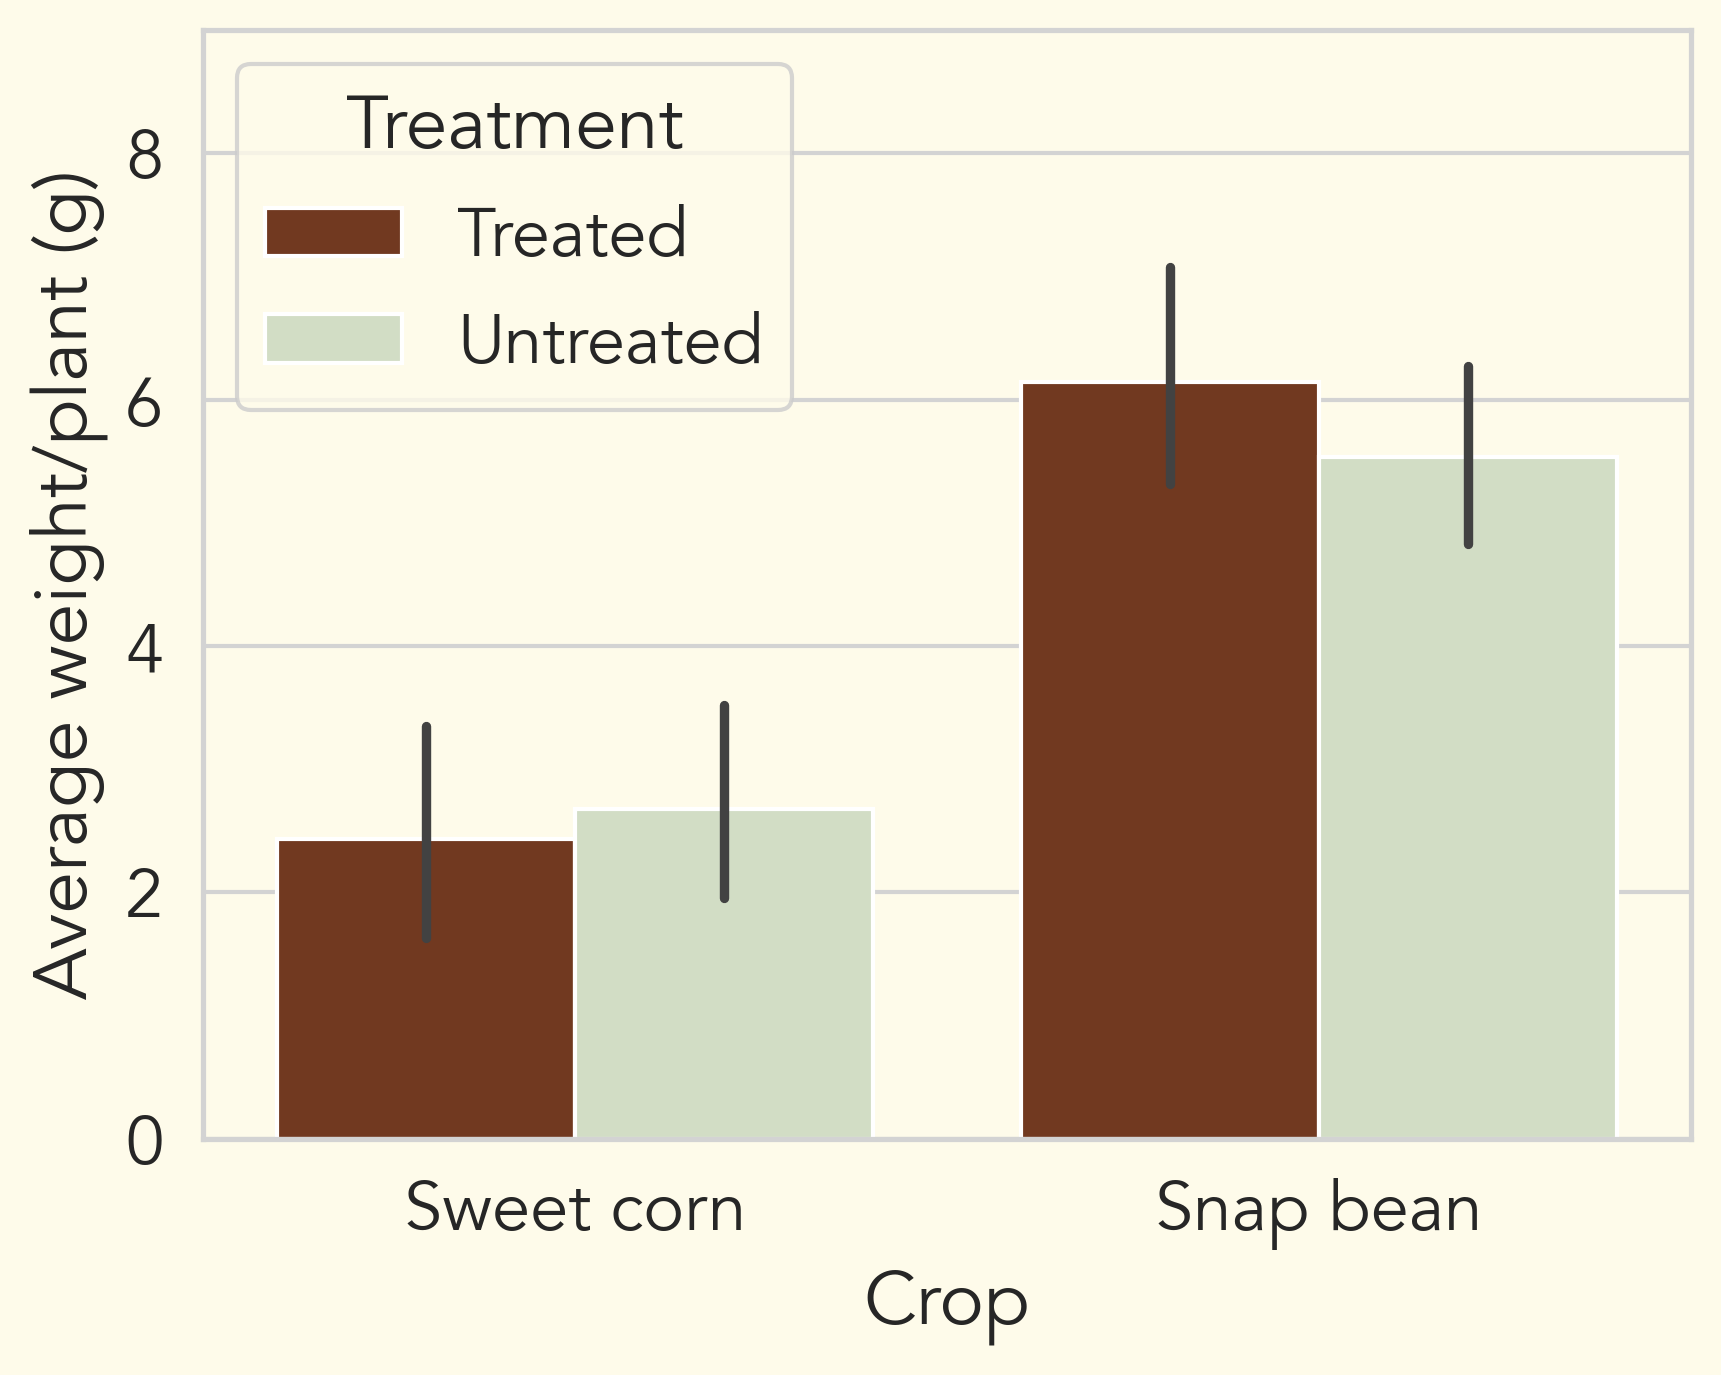

In [196]:
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'axes.facecolor':'#fefbeaff', 'figure.facecolor':'#fefbeaff', 'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

palette = ['#7e3412', '#d2e1c1']
hue_order = ['Treated', 'Untreated']
ax = sns.barplot(data = veg_crop_biomass, x = 'Crop', y = 'Avg weight', hue = 'Treatment', palette=palette, hue_order=hue_order)
ax.set_ylim(0, 9)
plt.ylabel('Average weight/plant (g)')

In [198]:
sweet_corn_biomass = veg_crop_biomass[veg_crop_biomass['Crop'] == 'Sweet corn']
snap_biomass = veg_crop_biomass[veg_crop_biomass['Crop'] == 'Snap bean']

In [199]:
t1 = sweet_corn_biomass.loc[sweet_corn_biomass['Treatment'] == 'Treated'].groupby('Field ID')['Avg weight'].mean()
t2 = sweet_corn_biomass.loc[sweet_corn_biomass['Treatment'] == 'Untreated'].groupby('Field ID')['Avg weight'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=-0.5127830343927043, pvalue=0.6434727954565693, df=3)

In [230]:
silage_yield = pd.read_csv('Data/silage_yield.csv')
silage_yield['Treatment'] = silage_yield['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
silage_yield

,Data Collector,Field ID,Date,Sampling period,Crop,Grain or Silage,Treatment,Yield (tons/acre),Yield (dry matter)
0,Natika Walters,KUH_COL,9/17/2025,Harvest,Field corn,Silage,Treated,18.700,6.73
1,Natika Walters,KUH_COL,9/17/2025,Harvest,Field corn,Silage,Untreated,18.500,6.43
2,Katelyn Miller,MIL_CRO_2,9/22/2025,Harvest,Field corn,Silage,Treated,20.270,6.75
3,Katelyn Miller,MIL_CRO_2,9/22/2025,Harvest,Field corn,Silage,Untreated,18.350,7.32
4,Katelyn Miller,MIL_CRO_1,9/22/2025,Harvest,Field corn,Silage,Treated,30.610,9.00
5,Katelyn Miller,MIL_CRO_1,9/22/2025,Harvest,Field corn,Silage,Untreated,27.920,8.51
6,Erik Smith,SMI_LAT,10/15/2025,Harvest,Field corn,Silage,Treated,15.770,6.49
7,Erik Smith,SMI_LAT,10/15/2025,Harvest,Field corn,Silage,Untreated,17.233,6.42
8,Jodi Letham,LET_STE,9/29/2025,Harvest,Field corn,Silage,Treated,12.160,4.40
9,Jodi Letham,LET_STE,9/29/2025,Harvest,Field corn,Silage,Untreated,16.410,5.94


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_51884/3989978922.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = silage_yield, x = 'Treatment', y = 'Yield (dry matter)', palette=palette)


Text(0, 0.5, 'Yield (dry matter, tons/ac)')

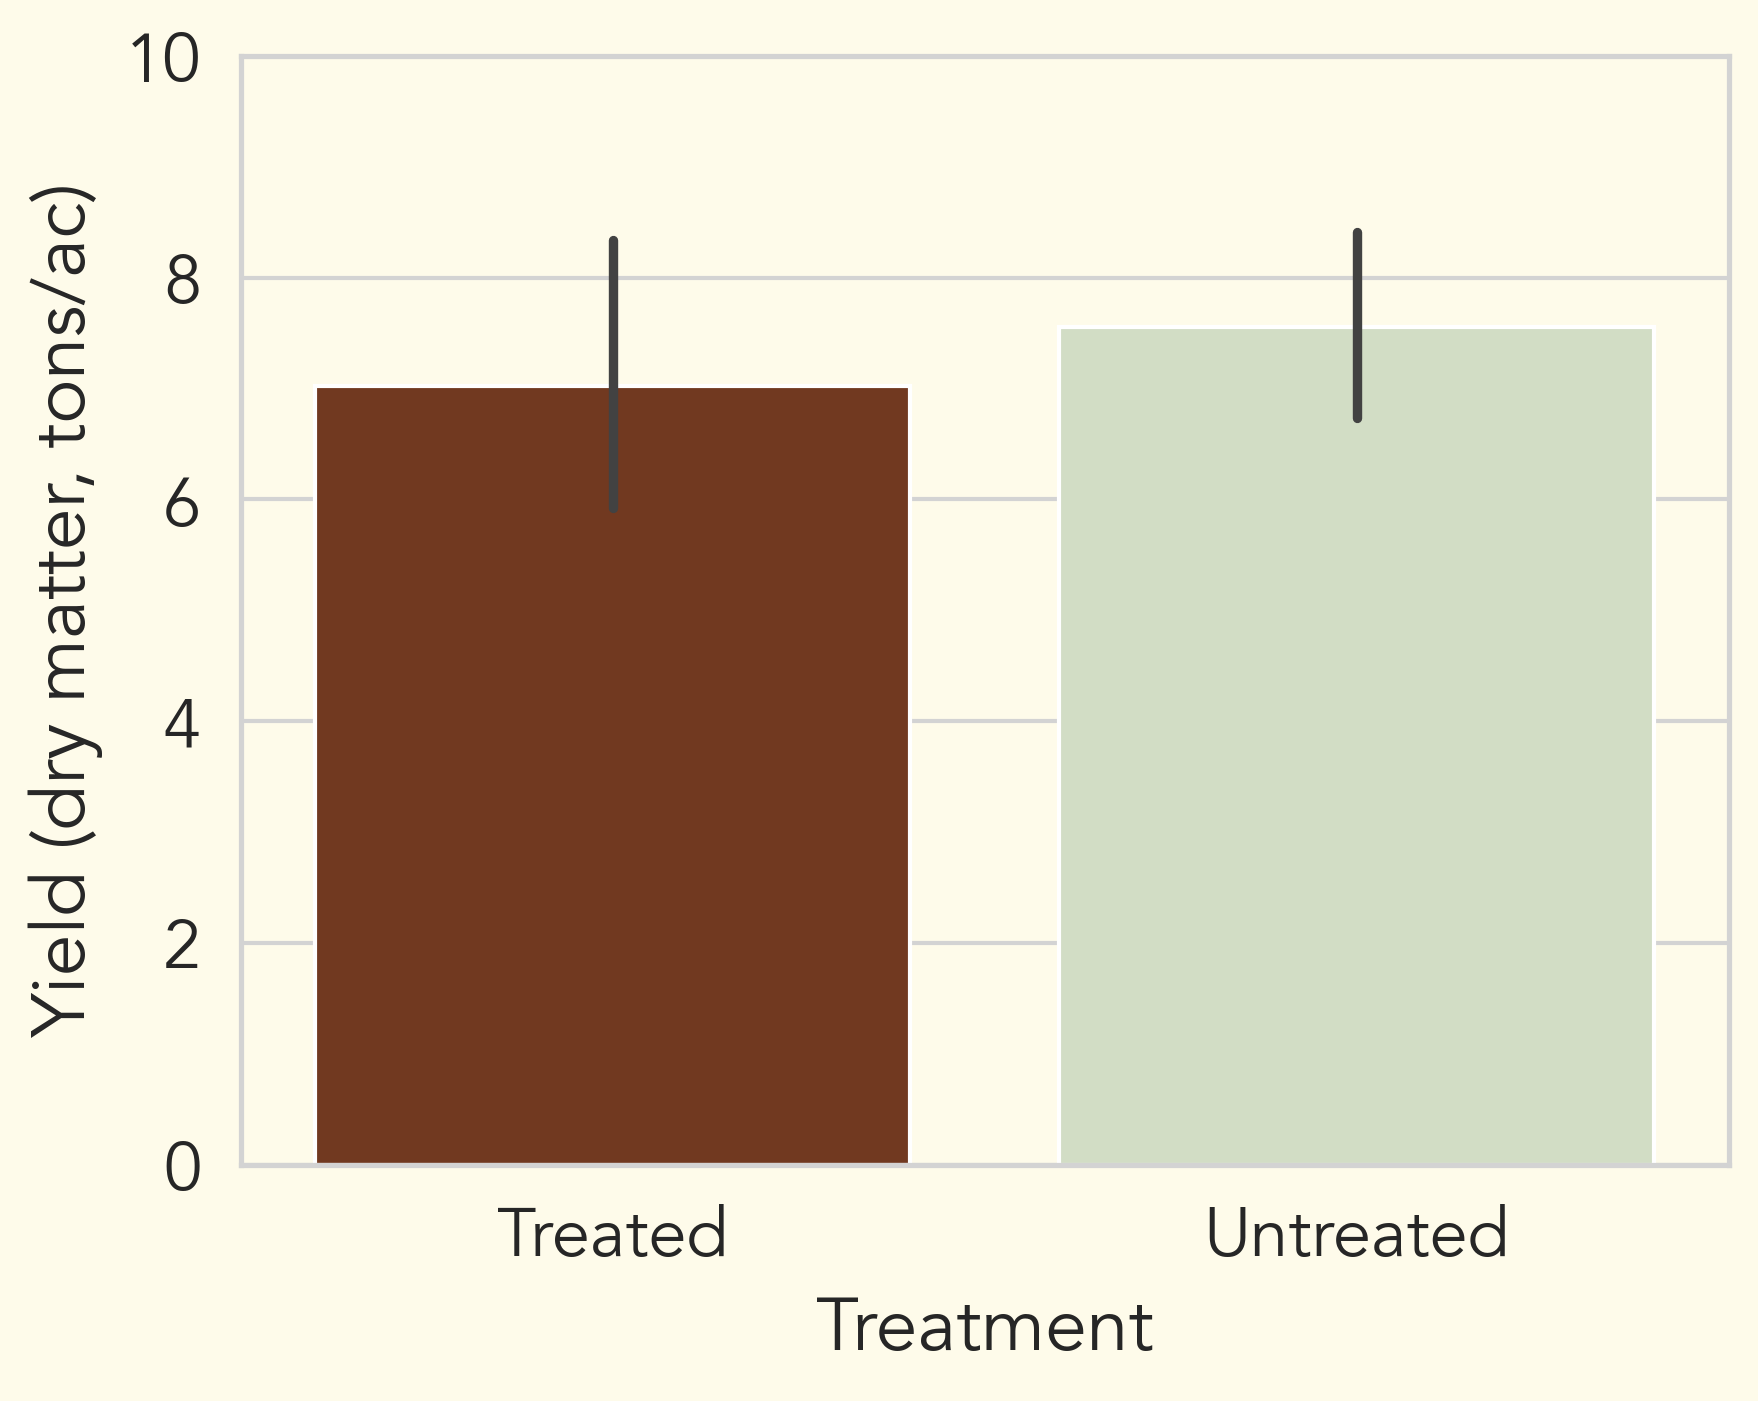

In [233]:
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'axes.facecolor':'#fefbeaff', 'figure.facecolor':'#fefbeaff', 'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

palette = ['#7e3412', '#d2e1c1']
ax = sns.barplot(data = silage_yield, x = 'Treatment', y = 'Yield (dry matter)', palette=palette)
ax.set_ylim(0, 10)
plt.ylabel('Yield (dry matter, tons/ac)')

In [232]:
t1 = silage_yield.loc[silage_yield['Treatment'] == 'Treated'].groupby('Field ID')['Yield (dry matter)'].mean()
t2 = silage_yield.loc[silage_yield['Treatment'] == 'Untreated'].groupby('Field ID')['Yield (dry matter)'].mean()
stats.ttest_rel(t1, t2)

TtestResult(statistic=-1.4440970440372332, pvalue=0.1919364365071552, df=7)

In [234]:
soy_yield = pd.read_csv('Data/soybean_yield.csv')
soy_yield['Treatment'] = soy_yield['Treatment'].replace({'Neonic': 'Treated', 'Fung': 'Untreated'})
soy_yield

,Data Collector,Field ID,Date,Sampling period,Crop,Treatment,Yield (bu/acre)
0,Katelyn Miller,MIL_COB,10/17/2025,Harvest,Soybean,Treated,57.50
1,Katelyn Miller,MIL_COB,10/17/2025,Harvest,Soybean,Untreated,54.70
2,Erik Smith,SMI_ARN_2,10/27/2025,Harvest,Soybean,Treated,32.52
3,Erik Smith,SMI_ARN_2,10/27/2025,Harvest,Soybean,Untreated,33.81
4,Janice Degni,DEG_LAF_2,10/15/2025,Harvest,Soybean,Treated,49.00
5,Janice Degni,DEG_LAF_2,10/15/2025,Harvest,Soybean,Untreated,38.00


/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_51884/3405343652.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = soy_yield, x = 'Treatment', y = 'Yield (bu/acre)', palette=palette)


Text(0, 0.5, 'Yield (bu/acre)')

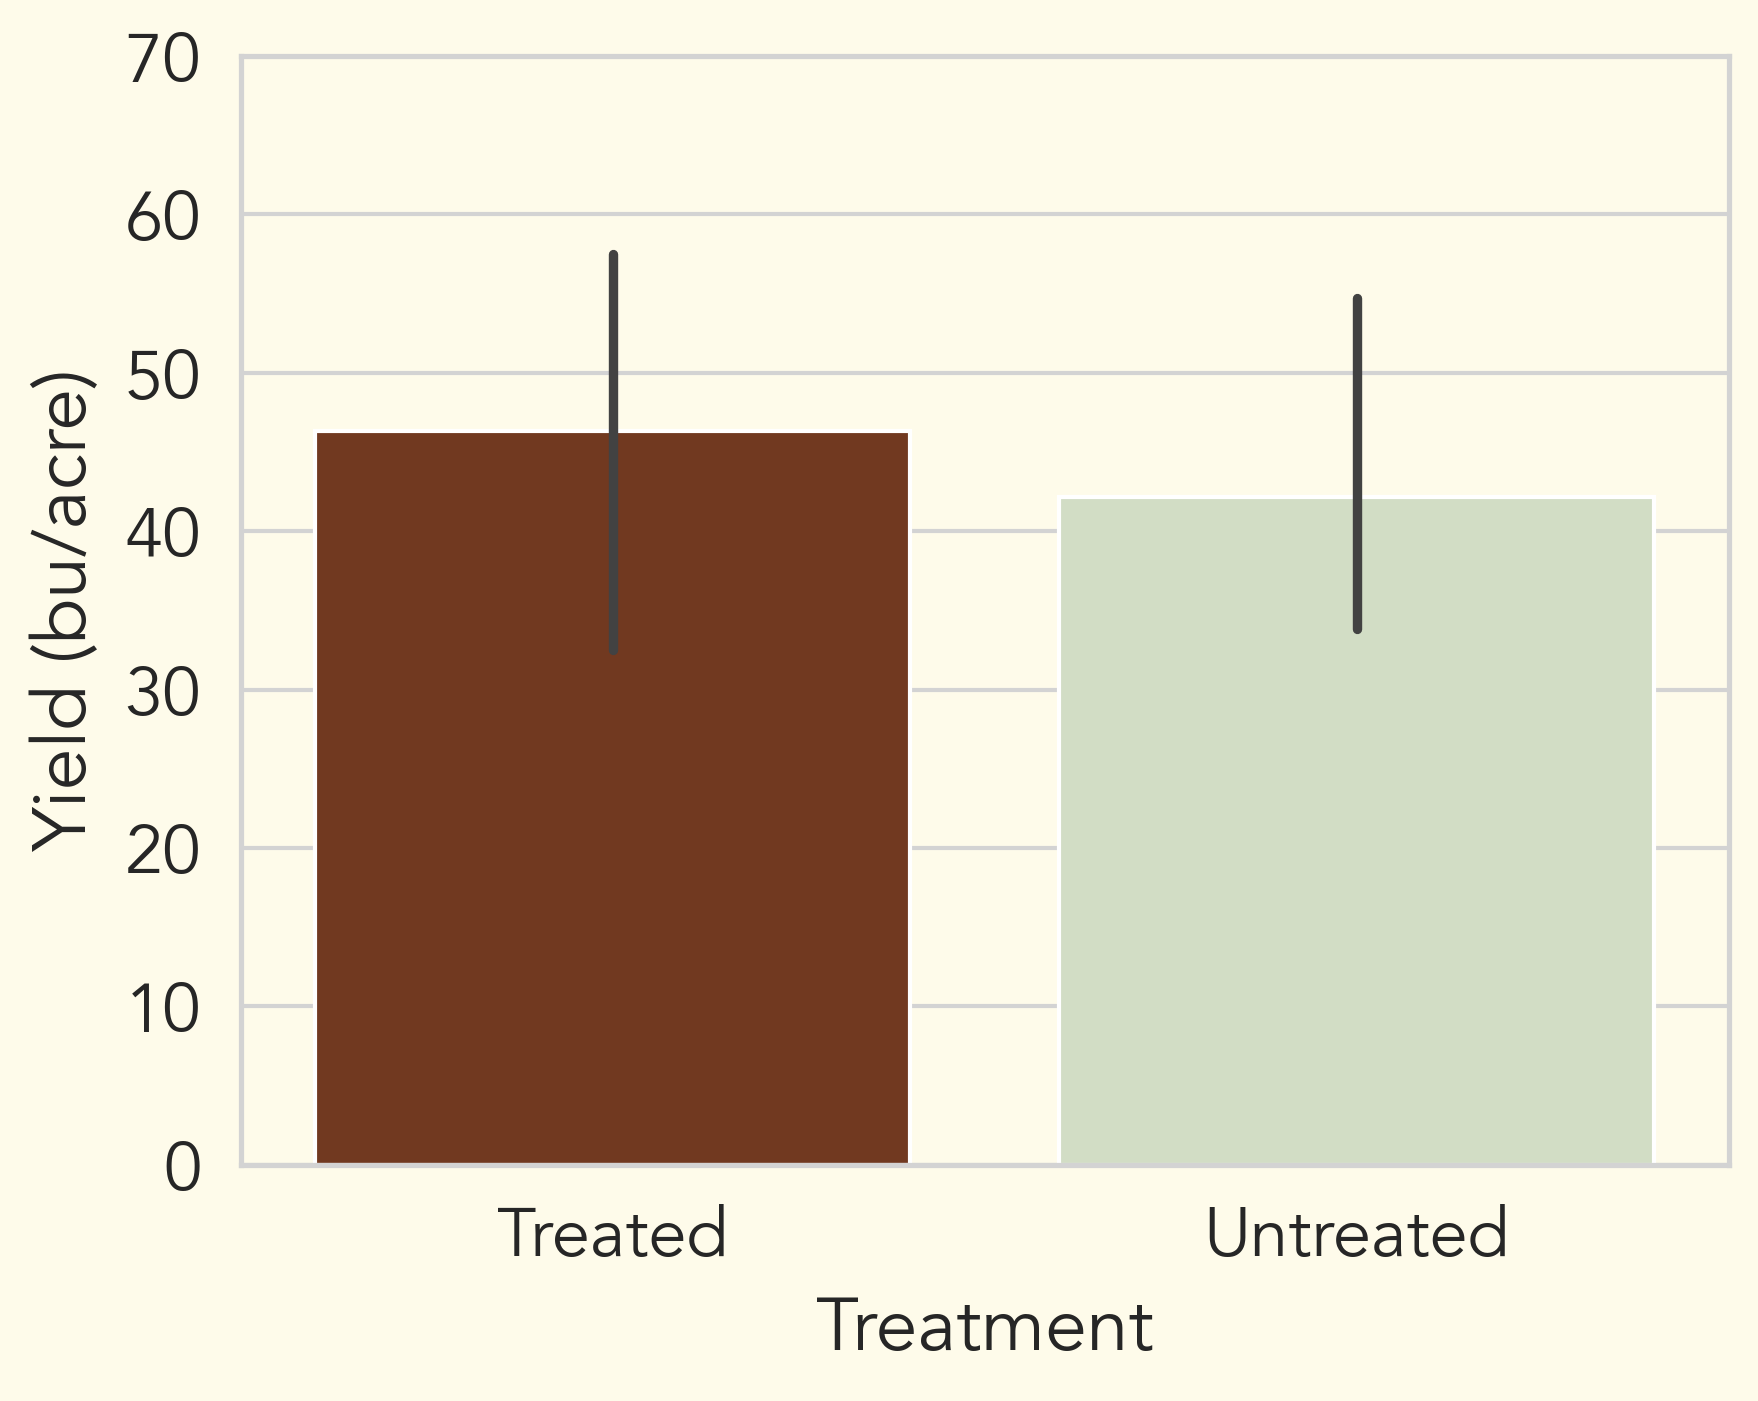

In [236]:
plt.rcParams.update({"figure.dpi": 300})
sns.set(font="Avenir", font_scale=1.5, rc={'axes.facecolor':'#fefbeaff', 'figure.facecolor':'#fefbeaff', 'grid.color': 'lightgray', 'axes.edgecolor': 'lightgray', 'legend.frameon':True})

palette = ['#7e3412', '#d2e1c1']
ax = sns.barplot(data = soy_yield, x = 'Treatment', y = 'Yield (bu/acre)', palette=palette)
ax.set_ylim(0, 70)
plt.ylabel('Yield (bu/acre)')